# 1.Chuẩn bị dữ liệu

## 1.1 Tải dữ liệu

In [ ]:
import pandas as pd

In [ ]:
file_name ='data_10y.csv'
data = pd.read_csv(file_name, header=[0, 1], index_col=0, parse_dates=True)

In [ ]:
print(data)

Price              Close                                            \
Ticker            ACB.VN        BID.VN        CTG.VN        FPT.VN   
Date                                                                 
2015-10-01   3166.126709  13552.242188  13480.748047  10588.070312   
2015-10-02   3182.446777  13379.234375  13411.968750  10588.070312   
2015-10-05   3198.767334  13609.911133  13755.865234  10683.030273   
2015-10-06   3296.688721  14186.602539  13962.203125  10920.430664   
2015-10-07   3247.728027  13840.588867  13755.865234  10730.510742   
...                  ...           ...           ...           ...   
2025-09-25  25650.000000  40450.000000  49895.804688  98000.000000   
2025-09-26  25650.000000  40103.851562  50292.589844  97500.000000   
2025-09-29  25600.000000  39856.601562  50590.179688  95500.000000   
2025-09-30  25500.000000  39559.902344  50391.785156  93000.000000   
2025-10-01  25800.000000  39609.351562  51086.160156  93400.000000   

Price              

# 2.Tiền xử lý và phân tích dữ liệu

##2.1 Xử lý dữ liệu thiếu

In [ ]:
df_close = data['Close']

In [ ]:
print(df_close.isna().sum())
print(df_close.info())

Ticker
ACB.VN    5
BID.VN    0
CTG.VN    4
FPT.VN    0
GAS.VN    0
HPG.VN    0
MBB.VN    0
NKG.VN    0
REE.VN    0
VCB.VN    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2015-10-01 to 2025-10-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACB.VN  2493 non-null   float64
 1   BID.VN  2498 non-null   float64
 2   CTG.VN  2494 non-null   float64
 3   FPT.VN  2498 non-null   float64
 4   GAS.VN  2498 non-null   float64
 5   HPG.VN  2498 non-null   float64
 6   MBB.VN  2498 non-null   float64
 7   NKG.VN  2498 non-null   float64
 8   REE.VN  2498 non-null   float64
 9   VCB.VN  2498 non-null   float64
dtypes: float64(10)
memory usage: 214.7 KB
None


In [ ]:
df_close[df_close.isna().any(axis=1)]

Ticker,ACB.VN,BID.VN,CTG.VN,FPT.VN,GAS.VN,HPG.VN,MBB.VN,NKG.VN,REE.VN,VCB.VN
Date,,,,,,,,,,
2020-12-02,NaN,23932.683594,23213.021484,25394.564453,57046.460938,15237.848633,7213.179199,6857.638672,26037.542969,41201.339844
2020-12-03,NaN,23990.351562,23247.412109,25394.564453,57386.023438,15906.932617,7094.930664,7146.990723,25444.554688,41201.339844
2020-12-04,NaN,24019.187500,23866.425781,25440.238281,58065.144531,15950.099609,7078.037598,7552.083496,25336.738281,40143.765625
2020-12-07,NaN,24797.718750,23866.425781,25440.238281,58608.441406,16489.683594,7061.145020,8072.916504,25282.832031,41025.078125
2020-12-08,NaN,24624.712891,23728.867188,25668.607422,58472.621094,16576.015625,7213.179199,8188.657227,25067.199219,41025.078125
2024-01-18,17654.455078,38824.285156,NaN,70370.726562,64188.617188,20946.968750,13658.450195,21000.000000,39710.351562,60494.882812
2024-08-27,20303.921875,40540.726562,NaN,113184.289062,71178.609375,21458.333984,15877.324219,18166.666016,58720.109375,60760.503906
2024-10-30,20843.701172,38987.757812,NaN,116088.640625,66391.875000,22500.000000,16267.750977,17208.333984,55638.585938,60893.316406
2024-11-05,20553.048828,38742.550781,NaN,113269.718750,65451.476562,22083.333984,15909.859375,17416.666016,54440.218750,61490.960938


In [ ]:
df_close = df_close.fillna(method='ffill') #fill bằng ngày hôm trước
print(df_close.isna().sum())

Ticker
ACB.VN    0
BID.VN    0
CTG.VN    0
FPT.VN    0
GAS.VN    0
HPG.VN    0
MBB.VN    0
NKG.VN    0
REE.VN    0
VCB.VN    0
dtype: int64


/tmp/ipython-input-1453029756.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_close = df_close.fillna(method='ffill') #fill bằng ngày hôm trước


#3.Chiến lược giao dịch

##3.1 Giao dịch cặp (Pair Trading)

###3.1.1 Tìm cặp cổ phiếu

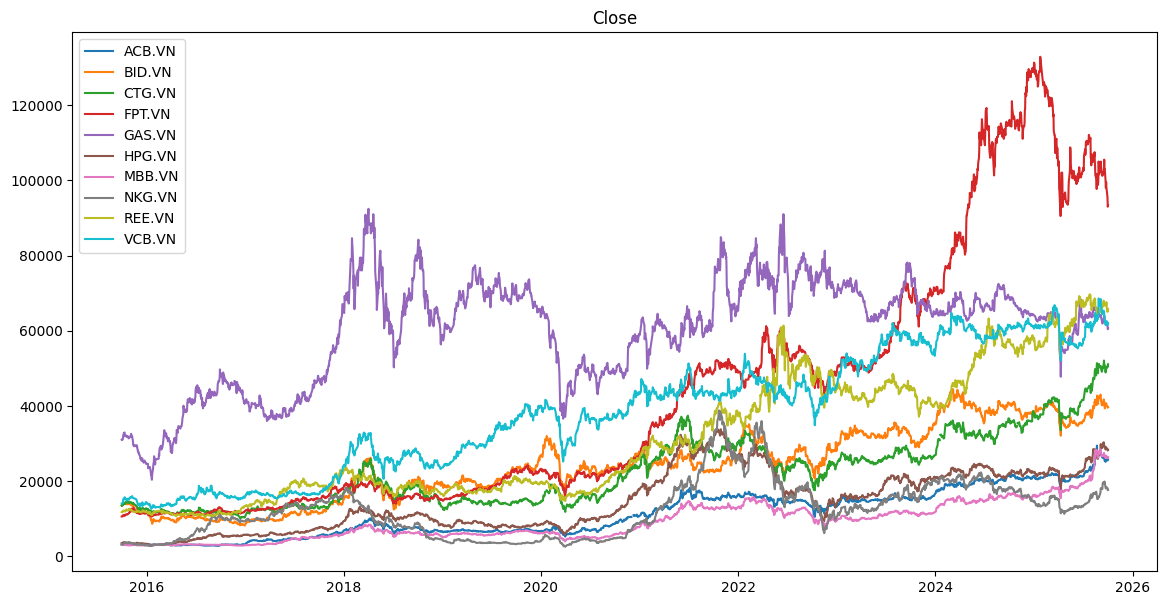

In [ ]:
import matplotlib.pyplot as plt
df = data['Close']

plt.figure(figsize=(14, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.title("Close")
plt.legend()
plt.show()

### 3.1.2 Kiểm định đồng liên kết

In [ ]:
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.columns
    pairs = []

    print("Đang chạy kiểm định Engle-Granger...")
    for i in range(n):
        for j in range(i+1, n): # Tránh lặp lại và tự so sánh
            s1 = data[keys[i]]
            s2 = data[keys[j]]

            # Kiểm định coint từ statsmodels
            # Hàm này thực hiện cả hồi quy và kiểm định ADF trên phần dư
            result = coint(s1, s2)
            score = result[0]
            pvalue = result[1]

            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue

            if pvalue < 0.05:
                pairs.append((keys[i], keys[j], pvalue))
                print(f"Cặp đồng liên kết tìm thấy: {keys[i]} - {keys[j]} (p-value: {pvalue:.4f})")

    return score_matrix, pvalue_matrix, pairs

In [ ]:
split_point = int(len(df) * 0.8)
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

Đang chạy kiểm định Engle-Granger...
Cặp đồng liên kết tìm thấy: ACB.VN - BID.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - CTG.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - FPT.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - GAS.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - HPG.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - MBB.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - NKG.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - REE.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - VCB.VN (p-value: 0.0000)


/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reli

Cặp đồng liên kết tìm thấy: BID.VN - VCB.VN (p-value: 0.0034)
Cặp đồng liên kết tìm thấy: CTG.VN - HPG.VN (p-value: 0.0088)
Cặp đồng liên kết tìm thấy: CTG.VN - MBB.VN (p-value: 0.0488)


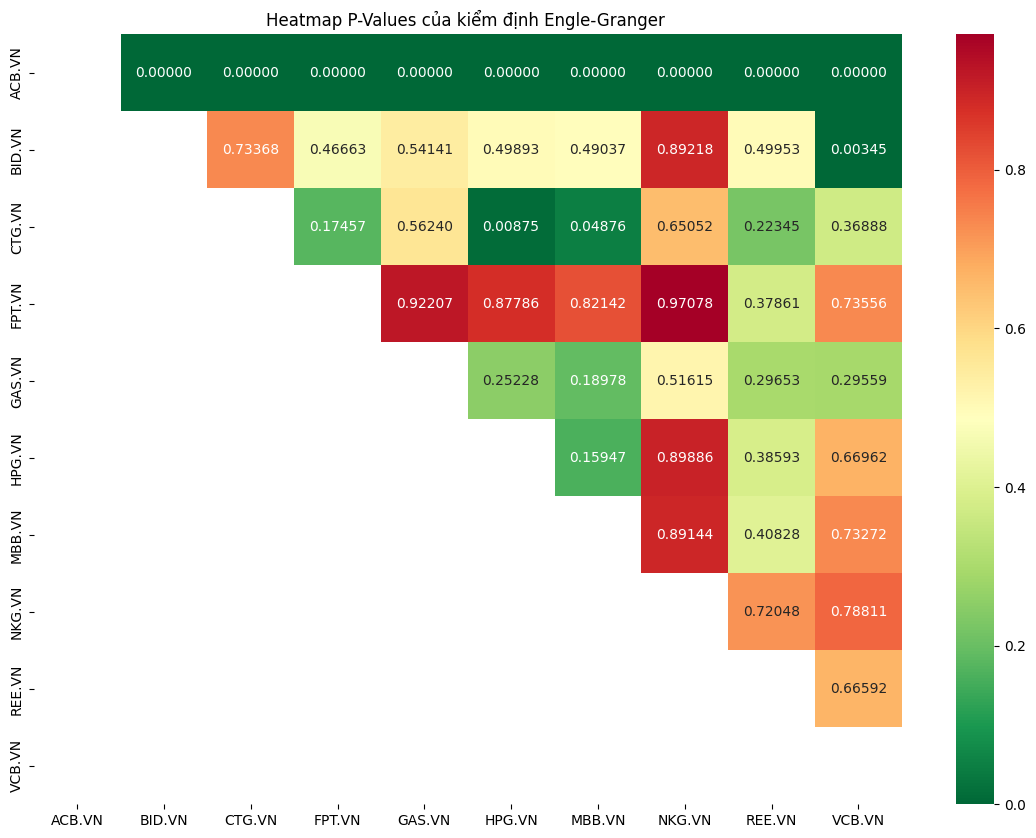

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Chạy trên dữ liệu Log Prices
df_kd = df_train.copy()
df_kd = np.log(df_kd)
scores, pvalues, cointegrated_pairs = find_cointegrated_pairs(df_kd)

# Vẽ Heatmap P-values để dễ quan sát
plt.figure(figsize=(14, 10))
sns.heatmap(pvalues, xticklabels=df.columns, yticklabels=df.columns,
            cmap='RdYlGn_r', mask=(pvalues >= 0.99), annot=True, fmt=".5f")
plt.title("Heatmap P-Values của kiểm định Engle-Granger ")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np

def calc_half_life(spread):
    """Tính half-life theo OU process"""
    spread_lag = spread.shift(1).dropna()
    spread_ret = spread.diff().dropna()

    model = sm.OLS(spread_ret, sm.add_constant(spread_lag)).fit()
    beta = model.params.iloc[1]

    if beta >= 0:   # tránh log dương hoặc zero gây lỗi
        return np.inf

    halflife = -np.log(2) / beta
    return halflife


def hurst_exponent(ts):
    """Tính Hurst exponent"""
    lags = range(2, 100)
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    hurst = poly[0] * 2.0
    return hurst


# ============================================================
# KIỂM ĐỊNH TOÀN BỘ CÁC CẶP
# ============================================================

for s1, s2, p in cointegrated_pairs:
    print(f"\n=== Kiểm định cho spread {s1} - {s2} ===")

    y = df[s1]
    x = df[s2]

    # Loại bỏ NaN
    valid_idx = y.notna() & x.notna()
    y = y[valid_idx]
    x = x[valid_idx]

    # OLS để lấy residual (spread)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    resid = model.resid

    # ---- ADF TEST ----
    adf_stat, adf_pvalue, _, _, crit, _ = adfuller(resid)
    if adf_pvalue <= 0.05:
      print(f"ADF Statistic : {adf_stat:.4f}")
      print(f"ADF p-value   : {adf_pvalue:.4f}")
      print(f"Critical Values: {crit}")

      # ---- HALF-LIFE ----
      hl = calc_half_life(resid)
      print(f"Half-life     : {hl:.2f}")

      # ---- HURST EXPONENT ----
      hurst = hurst_exponent(resid.values)
      print(f"Hurst Exponent: {hurst:.4f}")
    else:
      print(f'Thất bại')


=== Kiểm định cho spread ACB.VN - BID.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - CTG.VN ===
ADF Statistic : -3.2322
ADF p-value   : 0.0182
Critical Values: {'1%': np.float64(-3.4330077865854363), '5%': np.float64(-2.8627141882428515), '10%': np.float64(-2.5673950671859886)}
Half-life     : 56.88
Hurst Exponent: 0.4026

=== Kiểm định cho spread ACB.VN - FPT.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - GAS.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - HPG.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - MBB.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - NKG.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - REE.VN ===
ADF Statistic : -3.2700
ADF p-value   : 0.0163
Critical Values: {'1%': np.float64(-3.433005627914427), '5%': np.float64(-2.862713234984453), '10%': np.float64(-2.567394559656695)}
Half-life     : 78.79
Hurst Exponent: 0.4593

=== Kiểm định cho spread ACB.VN - VCB.VN ===
Thất bại

=== Kiểm định cho spread BID.VN - VCB.VN ===
ADF Statistic : -4.6613


###3.1.3 Chọn cặp

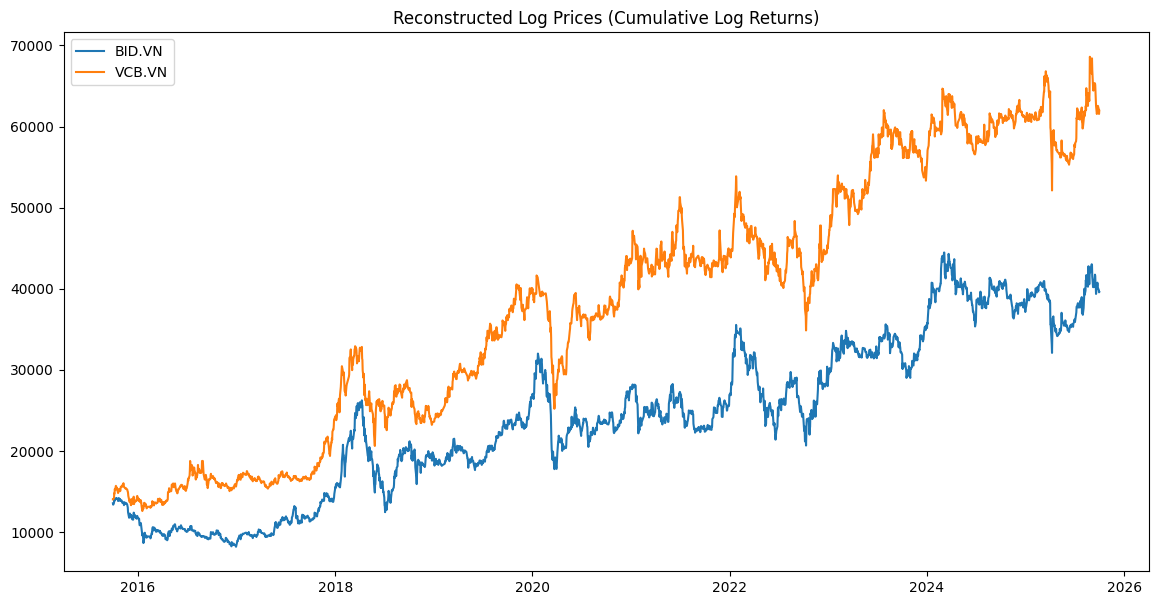

In [ ]:
# Vẽ biểu đồ để hình dung xu hướng giá tích lũy: chọn cặp BID và VCB, lý do cùng nhóm cluster, kiểm định engle,adf và cùng nhóm ngành liên quan đến năng lượng
plt.figure(figsize=(14, 7))

plt.plot(df_close.index, df_close['BID.VN'], label='BID.VN')
plt.plot(df_close.index, df_close['VCB.VN'], label='VCB.VN')
plt.title("Reconstructed Log Prices (Cumulative Log Returns)")
plt.legend()
plt.show()

###3.1.4 Tính toán tham số mô hình

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Cài đặt ban đầu
WINDOW = 60  # rolling window
col1, col2 = 'BID.VN','VCB.VN'
data = pd.read_csv('data_10y.csv', header=[0, 1], index_col=0, parse_dates=True)
df = pd.DataFrame({
    col1: data['Close'][col1],
    col2: data['Close'][col2]
})


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS # Thư viện vectorization

def pair_trading_signals(df, col1, col2, window=30):
    """
    Tối ưu hóa việc tính toán các chỉ số Pair Trading bằng RollingOLS.
    """
    df = df.copy()

    # --- 1. Log price series ---
    log1 = np.log(df[col1])
    log2 = np.log(df[col2])

    # --- 2. Rolling OLS (Vectorized) ---
    # Sử dụng log2 (X) làm biến độc lập và thêm hằng số
    X = sm.add_constant(log2)
    Y = log1

    # Khởi tạo và chạy Rolling OLS
    rols = RollingOLS(Y, X, window=window)
    rres = rols.fit()

    # Gán Beta và Alpha (mu)
    df['mu'] = rres.params['const'] # Alpha (intercept)
    df['beta'] = rres.params[col2]  # Beta (slope)

    # --- 3. Tính Spread (Phần dư) ---
    # Spread = log(P1) - alpha - beta * log(P2)
    # Ta phải điền NaN cho phần dữ liệu ban đầu (window-1 ngày)
    df['spread'] = log1 - df['mu'] * log1.apply(lambda x: 1) - df['beta'] * log2

    # Loại bỏ NaN nếu có (do không đủ window)
    df = df.dropna(subset=['beta', 'mu', 'spread'])

    # --- 4. Tính Z-score và Volatility ---
    # Lưu ý: Rolling Mean/Std của spread phải được tính trên CHÍNH SPREAD
    df['spread_mean'] = df['spread'].rolling(window).mean()
    df['spread_std'] = df['spread'].rolling(window).std()
    df['zscore'] = (df['spread'] - df['spread_mean']) / df['spread_std']
    df['spread_vol'] = df['spread_std']

    # --- Cleanup ---
    # Loại bỏ lại NaN cho rolling window đầu tiên (do mean/std cần window ngày)
    df = df.dropna(subset=['zscore', 'spread_mean'])

    return df

In [ ]:
df = pair_trading_signals(df, col1, col2, window=WINDOW)
df

,BID.VN,VCB.VN,mu,beta,spread,spread_mean,spread_std,zscore,spread_vol
Date,,,,,,,,,
2016-03-23,10149.764648,14003.069336,-11.159863,2.143762,-0.081491,-0.064352,0.036888,-0.464608,0.036888
2016-03-24,9919.088867,13741.940430,-10.601715,2.084799,-0.060465,-0.064962,0.036508,0.123189,0.036508
2016-03-25,9976.757812,13970.428711,-9.814242,2.001684,-0.083210,-0.065953,0.036176,-0.477041,0.036176
2016-03-28,9919.088867,13970.428711,-8.957971,1.911364,-0.083204,-0.066798,0.035973,-0.456056,0.035973
2016-03-29,9746.080078,13709.298828,-8.453680,1.858088,-0.061527,-0.067190,0.035782,0.158267,0.035782
...,...,...,...,...,...,...,...,...,...
2025-09-25,40450.000000,62543.476562,-0.712648,1.022762,0.025482,0.010401,0.019848,0.759840,0.019848
2025-09-26,40103.851562,62543.476562,-0.641395,1.016346,0.016482,0.010518,0.019863,0.300250,0.019863
2025-09-29,39856.601562,62146.375000,-0.522550,1.005627,0.016243,0.010680,0.019869,0.279947,0.019869


In [ ]:
import pandas as pd
import numpy as np

def backtest_pair_long_short(
    df,
    col1="BID.VN",
    col2="VCB.VN",
    beta_col="beta",
    zscore_col="zscore",
    spread_vol="spread_vol",
    entry_z=1.0,
    exit_z=0.0,
    max_risk_per_trade=0.02,
    initial_cash=100_000_000,
    buy_fee=0.001,
    sell_fee=0.002,
    allow_short=False,
    # stop_loss_pct=0.05, # Tạm thời loại bỏ để đơn giản hóa quá trình tối ưu
    vol_lower=0.0005,
    vol_upper_quantile=0.95 # Dùng Quantile thay vì giá trị cố định
):

    df = df.copy()

    # SHIFT beta, zscore, volatility (Đúng - dùng dữ liệu ngày T-1 để giao dịch ngày T)
    df[beta_col] = df[beta_col].shift(1)
    df[zscore_col] = df[zscore_col].shift(1)
    df[spread_vol] = df[spread_vol].shift(1)

    cash = initial_cash
    pos1 = 0
    pos2 = 0
    prev_equity = initial_cash
    total_trades = 0

    # Khởi tạo các cột đầu ra
    df["hold1"] = 0
    df["hold2"] = 0
    df["cash"] = 0.0
    df["equity"] = 0.0
    df["daily_pnl"] = 0.0
    df["trades"] = 0

    # Tính toán ngưỡng Volatility Quantile trên dữ liệu quá khứ (LOẠI BỎ LOOK-AHEAD BIAS)
    # Tính Quantile trên cửa sổ cố định/rolling, hoặc đơn giản là dùng giá trị cố định
    # Tạm thời loại bỏ ràng buộc Volatility để tập trung vào logic đóng/mở

    # Để tránh Look-ahead Bias, ta lấy vol_upper cố định (hoặc loại bỏ hoàn toàn ràng buộc này)
    # Nếu muốn dùng ràng buộc volatility, nên tính quantile trên cửa sổ rolling

    # ****************** LƯU Ý SỬA LỖI VOLATILITY ******************
    # có thể đặt vol_upper_fixed = 0.02 nếu muốn ràng buộc.
    # **************************************************************

    for i in range(len(df)):
        price1 = float(df.iloc[i][col1])
        price2 = float(df.iloc[i][col2])
        beta = df.iloc[i][beta_col]
        z = df.iloc[i][zscore_col]
        spread_vol_i = df.iloc[i][spread_vol] # Volatility tại ngày T-1

        # Skip missing values
        if pd.isna(beta) or pd.isna(z):
            # ... (Phần này giữ nguyên) ...
            df.iloc[i, df.columns.get_loc("hold1")] = pos1
            df.iloc[i, df.columns.get_loc("hold2")] = pos2
            df.iloc[i, df.columns.get_loc("cash")] = cash
            df.iloc[i, df.columns.get_loc("equity")] = cash + pos1 * price1 + pos2 * price2
            df.iloc[i, df.columns.get_loc("daily_pnl")] = 0.0
            df.iloc[i, df.columns.get_loc("trades")] = 0
            continue

        nav = cash + pos1 * price1 + pos2 * price2
        trades_today = 0

        # -------------------------------------------------------------
        # Ràng buộc Volatility đã được sửa đổi (Fixed Upper Bound)
        # Giả định vol_upper_fixed = 0.02 (hoặc giá trị cố định bạn muốn)
        # Nếu muốn dùng vol_upper_quantile, phải tính rolling quantile
        # Tạm thời chỉ kiểm tra vol_lower để cho phép nhiều giao dịch hơn trong tối ưu
        vol_allow = spread_vol_i > vol_lower # Loại bỏ vol_upper ràng buộc Look-ahead Bias
        # -------------------------------------------------------------

        # Position sizing
        max_leg_value = nav * max_risk_per_trade

        # Đảm bảo mẫu số không bằng 0
        denominator = price1 + abs(beta) * price2
        if denominator == 0:
             qty1 = 0
        else:
             qty1 = int(max_leg_value / denominator)

        qty2 = int(qty1 * abs(beta))


        # -------------------------------------------------------------
        # LOGIC GIAO DỊCH (ENTRY)
        # -------------------------------------------------------------

        # ENTRY - High spread (z > entry_z) → short 1, long 2
        if z > entry_z and pos1 == 0 and pos2 == 0 and vol_allow:

            # ... (Logic Position Sizing và Cash Check như cũ) ...
            sell_qty1 = qty1
            buy_qty2 = qty2

            net_cash_needed = buy_qty2*price2*(1+buy_fee) - sell_qty1*price1*(1-sell_fee)
            if net_cash_needed > cash:
                factor = cash / net_cash_needed if net_cash_needed > 0 else 0
                buy_qty2 = int(buy_qty2*factor)
                sell_qty1 = int(sell_qty1*factor)

            # Thực hiện giao dịch (chỉ khi đủ cash và không vi phạm allow_short)
            if allow_short or cash >= net_cash_needed: # Kiểm tra cash thay vì pos1 >= sell_qty1
                 cash += sell_qty1*price1*(1-sell_fee)
                 pos1 -= sell_qty1 # Short pos1
                 cash -= buy_qty2*price2*(1+buy_fee)
                 pos2 += buy_qty2 # Long pos2
                 trades_today += 1

        # ENTRY - Low spread (z < -entry_z) → long 1, short 2
        elif z < -entry_z and pos1 == 0 and pos2 == 0 and vol_allow:

            # ... (Logic Position Sizing và Cash Check như cũ) ...
            buy_qty1 = qty1
            sell_qty2 = qty2

            net_cash_needed = buy_qty1*price1*(1+buy_fee) - sell_qty2*price2*(1-sell_fee)
            if net_cash_needed > cash:
                factor = cash / net_cash_needed if net_cash_needed > 0 else 0
                buy_qty1 = int(buy_qty1*factor)
                sell_qty2 = int(sell_qty2*factor)

            # Thực hiện giao dịch (chỉ khi đủ cash và không vi phạm allow_short)
            if allow_short or cash >= net_cash_needed: # Kiểm tra cash thay vì pos2 >= sell_qty2
                cash -= buy_qty1*price1*(1+buy_fee)
                pos1 += buy_qty1 # Long pos1
                cash += sell_qty2*price2*(1-sell_fee)
                pos2 -= sell_qty2 # Short pos2
                trades_today += 1

        # -------------------------------------------------------------
        # LOGIC ĐÓNG VỊ THẾ HOÀN TOÀN (EXIT) - Đã sửa lỗi đóng một phần
        # -------------------------------------------------------------
        elif abs(z) < exit_z and (pos1 != 0 or pos2 != 0): # Đã có vị thế mở

            # Số lượng đóng phải bằng vị thế đang giữ
            close_qty1 = abs(pos1)
            close_qty2 = abs(pos2)

            # Chỉ đóng nếu có đủ cash cho các giao dịch đóng/mua lại
            # Đối với Short sale (pos < 0), ta phải mua lại (cash giảm)
            # Giả định luôn có đủ cash để mua lại vị thế Short

            can_close = True # Giả định luôn có thể đóng vị thế

            if can_close:
                # Đóng Leg 1
                if pos1 > 0: # Đang Long 1 -> Bán 1
                    cash += close_qty1 * price1 * (1 - sell_fee)
                elif pos1 < 0: # Đang Short 1 -> Mua lại 1
                    cash -= close_qty1 * price1 * (1 + buy_fee)
                pos1 = 0

                # Đóng Leg 2
                if pos2 > 0: # Đang Long 2 -> Bán 2
                    cash += close_qty2 * price2 * (1 - sell_fee)
                elif pos2 < 0: # Đang Short 2 -> Mua lại 2
                    cash -= close_qty2 * price2 * (1 + buy_fee)
                pos2 = 0

                trades_today += 1 # Ghi nhận 1 giao dịch đóng

        # -------------------------------------------------------------
        # LOGIC DỪNG LỖ (SL) - Bạn có thể thêm vào đây
        # -------------------------------------------------------------
        # Tuy nhiên, ta ưu tiên giải quyết vấn đề tối ưu hóa trước

        # Mark-to-market
        equity = cash + pos1*price1 + pos2*price2
        daily_pnl = equity - prev_equity
        prev_equity = equity

        # ... (Phần ghi log dữ liệu giữ nguyên) ...
        df.iloc[i, df.columns.get_loc("hold1")] = pos1
        df.iloc[i, df.columns.get_loc("hold2")] = pos2
        df.iloc[i, df.columns.get_loc("cash")] = cash
        df.iloc[i, df.columns.get_loc("equity")] = equity
        df.iloc[i, df.columns.get_loc("daily_pnl")] = daily_pnl
        df.iloc[i, df.columns.get_loc("trades")] = trades_today

        total_trades += trades_today

    # ====================================================================
    # TÍNH TOÁN HIỆU SUẤT (Giữ nguyên, logic tính đúng)
    # ====================================================================
    df["return"] = df["equity"].pct_change()

    # Số ngày giao dịch thực tế (bỏ qua NaN)
    n_days = df.iloc[1:]["return"].count()

    total_return = df["equity"].iloc[-1] / initial_cash - 1

    if n_days > 0:
        # Giả sử 252 ngày giao dịch trong 1 năm
        cagr = (1 + total_return) ** (252 / n_days) - 1
        volatility = df["return"].std() * np.sqrt(252)
        sharpe = cagr / volatility if volatility != 0 else np.nan
    else:
        cagr = volatility = sharpe = np.nan

    performance = {
        "Final Equity": df["equity"].iloc[-1],
        "Net P/L": df["equity"].iloc[-1] - initial_cash,
        "Annualized Return": cagr,      # Tên cột đã được sửa để phù hợp với hàm make_objective_sharpe
        "Annualized Volatility": volatility, # Tên cột đã được sửa
        "Sharpe Ratio": sharpe,
        "Total Trades": total_trades
    }

    # Chuyển đổi sang % và làm tròn cho output in ra
    # Tuy nhiên, trả về giá trị thô (float) để tính toán chính xác trong hàm tối ưu

    # print({k: (round(v * 100, 2) if isinstance(v, (float, np.float64)) and v < 1 and k in ["Annualized Return", "Annualized Volatility"] else round(v, 2)) for k, v in performance.items() if k not in ["Final Equity", "Net P/L"]})

    # Đảm bảo trả về các chỉ số dưới dạng FLOAT chính xác:
    perf_return = {
         "Final Equity": performance["Final Equity"],
         "Net P/L": performance["Net P/L"],
         "Annualized Return": performance["Annualized Return"],
         "Annualized Volatility": performance["Annualized Volatility"],
         "Sharpe Ratio": performance["Sharpe Ratio"],
         "Total Trades": performance["Total Trades"]
    }

    return df, perf_return

In [ ]:
df_bt, performance = backtest_pair_safe_fixed_shift(
    df,
    col1="BID.VN",
    col2="VCB.VN",
    beta_col="beta",
    zscore_col="zscore",
    entry_z=1,
    exit_z=0.0,
    max_risk_per_trade=0.01,  # 1% NAV mỗi bước
    initial_cash=100_000_000,
    allow_short=False
)

# Bây giờ df_bt là DataFrame → xem kết quả cuối
df_bt[['hold1','hold2','cash','equity','daily_pnl','trades']].tail(10)

# Xem performance summary
performance


{'Final Equity': np.float64(101576133.13689356),
 'Net P/L': np.float64(1576133.1368935555),
 'Annualized Return': np.float64(0.0016579006251271622),
 'Annualized Volatility': np.float64(0.004538576916066892),
 'Sharpe Ratio': np.float64(0.36529085124856503),
 'Total Trades': 1}

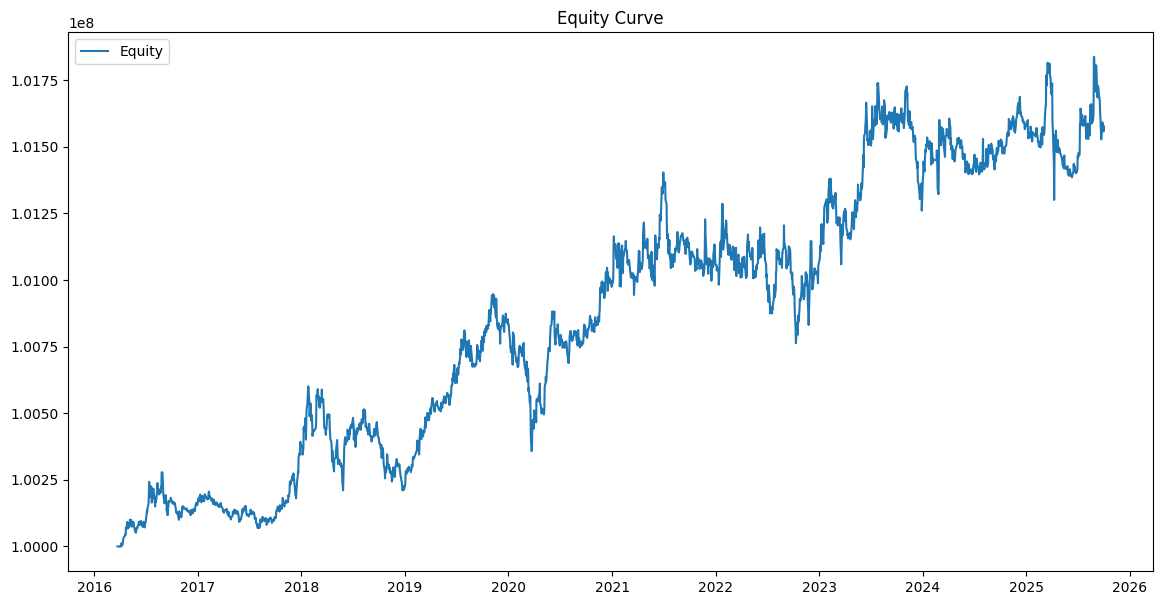

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df_bt.index, df_bt['equity'], label='Equity')

plt.title("Equity Curve")
plt.legend()
plt.show()

###3.1.5 Tối ưu tham số

In [ ]:
!pip install bayesian-optimization

In [ ]:
def make_objective_pnl(df, col1, col2,
                       initial_cash=100_000_000,
                       max_risk_per_trade=0.02,
                       buy_fee=0.001, sell_fee=0.002,
                       allow_short=False):

    def _objective(window, entry_z, exit_z):
        window_i = int(round(window))
        window_i = max(window_i, 5)

        entry_z_f = float(entry_z)
        exit_z_f  = float(exit_z)

        df_sig = pair_trading_signals(
            df,
            col1=col1,
            col2=col2,
            window=window_i,
            entry_z=entry_z_f,
            exit_z=exit_z_f
        )

        df_bt, perf = backtest_pair_safe_fixed_shift(
            df_sig,
            col1=col1,
            col2=col2,
            beta_col="beta",
            zscore_col="zscore",
            entry_z=entry_z_f,
            exit_z=exit_z_f,
            max_risk_per_trade=max_risk_per_trade,
            initial_cash=initial_cash,
            buy_fee=buy_fee,
            sell_fee=sell_fee,
            allow_short=allow_short
        )

        final_equity = perf["Final Equity"]
        pnl = final_equity - initial_cash

        print(f"[PNL] win={window_i}, entry={entry_z_f:.3f}, exit={exit_z_f:.3f} -> pnl={pnl:,.0f}")

        return pnl

    return _objective


In [ ]:
from bayes_opt import BayesianOptimization

def optimize_pnl(df, col1, col2):
    # tạo objective
    obj = make_objective_pnl(df, col1, col2)

    # phạm vi tham số
    pbounds = {
        "window": (5, 60),
        "entry_z": (0.5, 3.5),
        "exit_z": (0.2, 0.5) # không được chỉnh về 0
    }

    optimizer = BayesianOptimization(
        f=obj,
        pbounds=pbounds,
        verbose=2,
        random_state=42
    )

    optimizer.maximize(init_points=10, n_iter=50)

    return optimizer


### 3.1.6 Backtest (train/test)

In [ ]:
import pandas as pd
col1, col2 = 'BID.VN','VCB.VN'
data = pd.read_csv('data_10y.csv', header=[0, 1], index_col=0, parse_dates=True)
df = pd.DataFrame({
    col1: data['Close'][col1],
    col2: data['Close'][col2]
})

In [ ]:
split_point = int(len(df) * 0.8) #df phải tính chỉ số r
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

####3.1.6.1 Mục tiêu pnl

In [ ]:
opt = optimize_pnl(df_train, "BID.VN", "VCB.VN")

|   iter    |  target   |  window   |  entry_z  |  exit_z   |
-------------------------------------------------------------
{'Final Equity': np.float64(103407072.59191212), 'Net P/L': np.float64(3407072.5919121206), 'Total Return (%)': np.float64(3.41), 'CAGR (%)': np.float64(0.42), 'Volatility (%)': np.float64(0.59), 'Sharpe Ratio': np.float64(0.72), 'Total Trades': 8}
[PNL] win=26, entry=3.352, exit=0.420 -> pnl=3,407,073
| 1         | 3407072.5 | 25.599706 | 3.3521429 | 0.4195981 |
{'Final Equity': np.float64(118847932.85184571), 'Net P/L': np.float64(18847932.85184571), 'Total Return (%)': np.float64(18.85), 'CAGR (%)': np.float64(2.2), 'Volatility (%)': np.float64(5.03), 'Sharpe Ratio': np.float64(0.438), 'Total Trades': 990}
[PNL] win=38, entry=0.968, exit=0.247 -> pnl=18,847,933
| 2         | 1.884e+07 | 37.926216 | 0.9680559 | 0.2467983 |
{'Final Equity': np.float64(100000000.0), 'Net P/L': np.float64(0.0), 'Total Return (%)': np.float64(0.0), 'CAGR (%)': np.float64(0.0), 'Vola

In [ ]:
entry_z = opt.max['params']['entry_z']
exit_z  = opt.max['params']['exit_z']
window  = opt.max['params']['window']
print(f"Tham số tối ưu: window={window}, entry_z={entry_z:.3f}, exit_z")

Tham số tối ưu: window=38.72700594236812, entry_z=3.901, exit_z


In [ ]:
df_bt, performance = backtest_pair_safe_fixed_shift(
    df_test,
    col1  = "BID.VN",
    col2  = "VCB.VN",
    beta_col    = "beta",
    zscore_col  = "zscore",
    entry_z = entry_z,
    exit_z  = exit_z,
    max_risk_per_trade  = 0.02,  # 1% NAV mỗi bước
    initial_cash  = 100_000_000,
    allow_short = False
)


{'Final Equity': np.float64(108131170.72925591), 'Net P/L': np.float64(8131170.729255915), 'Total Return (%)': np.float64(8.13), 'CAGR (%)': np.float64(4.03), 'Volatility (%)': np.float64(8.25), 'Sharpe Ratio': np.float64(0.488), 'Total Trades': 389}


In [ ]:
df_bt[['hold1','hold2','cash','equity','daily_pnl','trades']]

,hold1,hold2,cash,equity,daily_pnl,trades
Date,,,,,,
2023-09-29,0,0,1.000000e+08,1.000000e+08,0.000000,0
2023-10-02,24,0,9.923418e+07,9.999923e+07,-765.058406,1
2023-10-03,48,0,9.851017e+07,9.995673e+07,-42501.186750,1
2023-10-04,72,0,9.776962e+07,9.998907e+07,32334.338672,1
2023-10-05,94,0,9.710515e+07,9.994140e+07,-47663.914344,1
...,...,...,...,...,...,...
2025-09-25,96,705,6.066033e+07,1.086367e+08,166723.610938,1
2025-09-26,76,725,6.020868e+07,1.086006e+08,-36085.273594,1
2025-09-29,76,725,6.020868e+07,1.082939e+08,-306689.632812,0


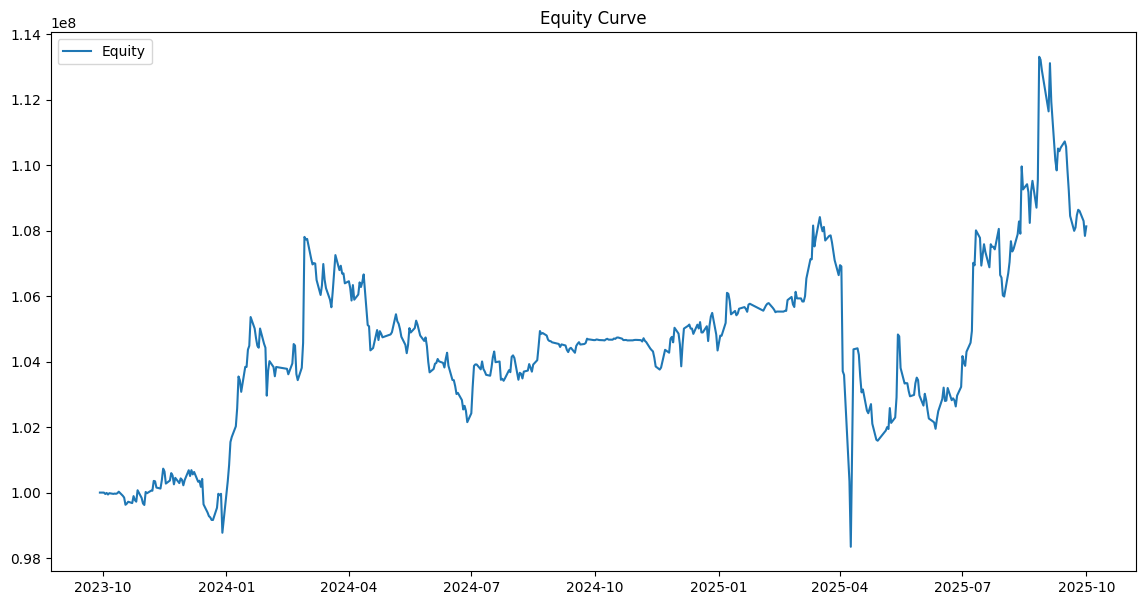

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_bt.index, df_bt['equity'], label='Equity')

plt.title("Equity Curve")
plt.legend()

####3.1.6.2 Mục tiêu Sharpe Ratio

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

def make_objective_sharpe(
    df, col1, col2,
    strategy="long_only",     # "long_only" hoặc "long_short"
    initial_cash=100_000_000,
    buy_fee=0.001, sell_fee=0.002,
    risk_free_rate=0.02,
    min_trades=3,
    n_splits=4
):

    PENALTY_VALUE = -100.0

    # Chọn hàm backtest đúng với strategy
    if strategy == "long_only":
        backtest_func = backtest_long_only_switching # nằm ở phần dưới
    elif strategy == "long_short":
        backtest_func = backtest_pair_long_short  #nằm ở phần dưới
    else:
        raise ValueError("strategy phải là 'long_only' hoặc 'long_short'")

    def _objective(window, entry_z, exit_z, max_risk):
        window_i = max(int(round(window)), 5)
        entry_z_f = float(entry_z)
        exit_z_f  = float(exit_z)
        max_risk_f = float(max_risk)

        tscv = TimeSeriesSplit(n_splits=n_splits)
        sharpe_scores = []

        for train_idx, val_idx in tscv.split(df):
            df_train = df.iloc[train_idx].copy()
            df_val   = df.iloc[val_idx].copy()

            df_fold = pd.concat([df_train, df_val]).reset_index(drop=True)

            # Tạo tín hiệu
            try:
                df_sig = pair_trading_signals_v2(
                    df_fold, col1=col1, col2=col2, window=window_i
                )
            except:
                return PENALTY_VALUE

            df_sig_val = df_sig.iloc[len(df_train):].reset_index(drop=True)

            # Backtest theo chiến thuật được chọn
            try:
                df_bt, perf = backtest_func(
                    df_sig_val,
                    col1=col1, col2=col2,
                    entry_z=entry_z_f, exit_z=exit_z_f,
                    initial_cash=initial_cash,
                    buy_fee=buy_fee, sell_fee=sell_fee,
                    max_risk_per_trade=max_risk_f
                )
            except:
                return PENALTY_VALUE

            # Metrics
            mu = perf.get("Annualized Return", 0.0)
            sigma = perf.get("Annualized Volatility", 0.0)
            trades = perf.get("Total Trades", 0)

            if trades < min_trades or sigma <= 1e-6:
                return PENALTY_VALUE

            sharpe = (mu - risk_free_rate) / sigma
            if np.isnan(sharpe) or np.isinf(sharpe):
                return PENALTY_VALUE

            sharpe_scores.append(sharpe)

        if not sharpe_scores:
            return PENALTY_VALUE

        return float(np.mean(sharpe_scores))

    return _objective



In [ ]:
from bayes_opt import BayesianOptimization

def optimize_sharpe(df, col1, col2, risk_free_rate=0.02, init_points=10, n_iter=50):

    pbounds_full_optimization = {
        "window": (25, 35),
        "entry_z": (2.0, 3.0),
        "exit_z": (0.5, 1.5),
        "max_risk": (0.1, 0.5)
    }

    obj = make_objective_sharpe(
        df, col1, col2,
        risk_free_rate=risk_free_rate,
        min_trades=3,       # đủ an toàn
        n_splits=4          # K-fold = 4
    )

    optimizer = BayesianOptimization(
        f=obj,
        pbounds=pbounds_full_optimization,
        verbose=2,
        random_state=42
    )

    print(f"\n--- Bắt đầu tối ưu hóa Sharpe Ratio (R_f = {risk_free_rate*100:.2f}%) ---")

    optimizer.maximize(init_points=init_points, n_iter=n_iter)

    print("\n--- Tối ưu hóa hoàn tất ---")

    best_params = optimizer.max.get('params', {})
    best_sharpe = optimizer.max.get('target', -999)

    print(f"Sharpe Ratio tốt nhất: {best_sharpe:.4f}")
    if best_params:
        print(f"Tham số tối ưu:")
        print(f"  - Window: {int(round(best_params.get('window')))}")
        print(f"  - Entry Z-score: {best_params.get('entry_z'):.3f}")
        print(f"  - Exit Z-score: {best_params.get('exit_z'):.3f}")
        print(f"  - Max Risk %: {best_params.get('max_risk'):.3f}")

    return optimizer


#####Tiêu chuẩn

#####Chỉ long

In [ ]:
import pandas as pd
col1, col2 = 'BID.VN','VCB.VN'
data = pd.read_csv('data_10y.csv', header=[0, 1], index_col=0, parse_dates=True)
df = pd.DataFrame({
    col1: data['Close'][col1],
    col2: data['Close'][col2]
})

In [ ]:
split_point = int(len(df) * 0.8) #df không phải tính chỉ số
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

In [ ]:
import pandas as pd
col1, col2 = 'BID.VN','VCB.VN'
data = pd.read_csv('data_10y.csv', header=[0, 1], index_col=0, parse_dates=True)
df = pd.DataFrame({
    col1: data['Close'][col1],
    col2: data['Close'][col2]
})
split_point = int(len(df) * 0.8)
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS # Vectorized OLS
from bayes_opt import BayesianOptimization # Import để dùng trong hàm optimize_sharpe

def pair_trading_signals_v2(df, col1, col2, window=30):
    """
    Tính toán Rolling Beta, Alpha, Spread và Z-score bằng RollingOLS.
    """
    df = df.copy()

    # 1. Log price series
    log1 = np.log(df[col1])
    log2 = np.log(df[col2])

    # 2. Rolling OLS (Vectorized)
    X = sm.add_constant(log2)
    Y = log1

    rols = RollingOLS(Y, X, window=window)
    rres = rols.fit()

    df['mu'] = rres.params['const'] # Alpha (intercept)
    df['beta'] = rres.params[col2]  # Beta (slope)

    # 3. Tính Spread (Phần dư)
    df['spread'] = log1 - df['mu'] - df['beta'] * log2

    # --- 4. Tính Z-score và Volatility ---
    df['spread_mean'] = df['spread'].rolling(window=window).mean()
    df['spread_std'] = df['spread'].rolling(window=window).std()
    df['zscore'] = (df['spread'] - df['spread_mean']) / df['spread_std']
    df['spread_vol'] = df['spread_std']

    df = df.dropna(subset=['zscore', 'beta'])

    return df

In [ ]:
def backtest_long_only_switching(
    df, col1, col2,
    beta_col="beta", zscore_col="zscore",
    entry_z=1.0, exit_z=0.0,
    initial_cash=100_000_000,
    buy_fee=0.001, sell_fee=0.002,
    max_risk_per_trade=0.2 # Tỷ lệ NAV tối đa dùng cho mỗi giao dịch (VD: 20%)
):
    df = df.copy()
    risk_free_rate = 0.02 # Giả định lãi suất phi rủi ro

    # 1. SHIFT (Chống Look-ahead Bias)
    df[zscore_col] = df[zscore_col].shift(1)

    cash = initial_cash
    pos1 = 0
    pos2 = 0
    prev_equity = initial_cash
    total_trades = 0

    # Khởi tạo cột
    for col in ["hold1", "hold2", "cash", "equity", "daily_pnl", "trades"]:
        df[col] = 0.0

    for i in range(len(df)):
        price1 = float(df.iloc[i][col1])
        price2 = float(df.iloc[i][col2])
        z = df.iloc[i][zscore_col]

        if pd.isna(z):
            # Cập nhật trạng thái nếu NaN
            equity = cash + pos1 * price1 + pos2 * price2
            df.iloc[i, df.columns.get_loc("cash")] = cash
            df.iloc[i, df.columns.get_loc("equity")] = equity
            df.iloc[i, df.columns.get_loc("hold1")] = pos1
            df.iloc[i, df.columns.get_loc("hold2")] = pos2
            df.iloc[i, df.columns.get_loc("daily_pnl")] = 0.0
            continue

        nav = cash + pos1 * price1 + pos2 * price2
        trades_today = 0

        # 2. LOGIC ĐÓNG VỊ THẾ HOÀN TOÀN (EXIT)
        if abs(z) < exit_z and (pos1 != 0 or pos2 != 0):

            if pos1 > 0: # Đang Long 1 -> Bán 1
                close_qty = pos1
                cash += close_qty * price1 * (1 - sell_fee)
                pos1 = 0
                trades_today += 1

            if pos2 > 0: # Đang Long 2 -> Bán 2
                close_qty = pos2
                cash += close_qty * price2 * (1 - sell_fee)
                pos2 = 0
                trades_today += 1

        # 3. LOGIC MỞ VỊ THẾ (ENTRY) - Chỉ mở khi đang KHÔNG có vị thế nào
        elif abs(z) >= entry_z and pos1 == 0 and pos2 == 0:

            # QUẢN LÝ VỐN: Dùng max_risk_per_trade của NAV hiện tại
            capital_to_use = nav * max_risk_per_trade
            investment_amount = min(capital_to_use, cash) # Không vượt quá Cash

            # Entry 1: Z < -entry_z (Long Leg 1 - Mua cổ phiếu 1)
            if z <= -entry_z:
                qty1 = int(investment_amount / (price1 * (1 + buy_fee)))
                if qty1 > 0:
                    cash -= qty1 * price1 * (1 + buy_fee)
                    pos1 += qty1
                    trades_today += 1

            # Entry 2: Z > entry_z (Long Leg 2 - Mua cổ phiếu 2)
            elif z >= entry_z:
                qty2 = int(investment_amount / (price2 * (1 + buy_fee)))
                if qty2 > 0:
                    cash -= qty2 * price2 * (1 + buy_fee)
                    pos2 += qty2
                    trades_today += 1

        # 4. Mark-to-market và Ghi log
        equity = cash + pos1*price1 + pos2*price2
        daily_pnl = equity - prev_equity
        prev_equity = equity

        df.iloc[i, df.columns.get_loc("cash")] = cash
        df.iloc[i, df.columns.get_loc("equity")] = equity
        df.iloc[i, df.columns.get_loc("hold1")] = pos1
        df.iloc[i, df.columns.get_loc("hold2")] = pos2
        df.iloc[i, df.columns.get_loc("daily_pnl")] = daily_pnl
        df.iloc[i, df.columns.get_loc("trades")] = trades_today

        total_trades += trades_today

    # 5. Tính Hiệu suất Cuối cùng
    df["return"] = df["equity"].pct_change()
    n_days = df["return"].count()
    total_return = df["equity"].iloc[-1] / initial_cash - 1

    if n_days > 0:
        cagr = (1 + total_return) ** (252 / n_days) - 1
        volatility = df["return"].std() * np.sqrt(252)
        sharpe = (cagr - risk_free_rate) / volatility if volatility != 0 else np.nan
    else:
        cagr = volatility = sharpe = np.nan

    performance = {
        "Final Equity": df["equity"].iloc[-1],
        "Net P/L": df["equity"].iloc[-1] - initial_cash,
        "Annualized Return": cagr,
        "Annualized Volatility": volatility,
        "Sharpe Ratio": sharpe,
        "Total Trades": total_trades
    }

    return df, performance

In [ ]:
opt = optimize_sharpe(df_train, "BID.VN", "VCB.VN")


--- Bắt đầu tối ưu hóa Sharpe Ratio (R_f = 2.00%) ---
|   iter    |  target   |  window   |  entry_z  |  exit_z   | max_risk  |
-------------------------------------------------------------------------
| 1         | -0.600596 | 28.745401 | 2.9507143 | 1.2319939 | 0.3394633 |
| 2         | 0.5826522 | 26.560186 | 2.1559945 | 0.5580836 | 0.4464704 |
| 3         | 0.1519552 | 31.011150 | 2.7080725 | 0.5205844 | 0.4879639 |
| 4         | -0.351172 | 33.324426 | 2.2123391 | 0.6818249 | 0.1733618 |
| 5         | -0.001583 | 28.042422 | 2.5247564 | 0.9319450 | 0.2164916 |
| 6         | 0.1604848 | 31.118528 | 2.1394938 | 0.7921446 | 0.2465447 |
| 7         | -0.140241 | 29.560699 | 2.7851759 | 0.6996737 | 0.3056937 |
| 8         | -0.089014 | 30.924145 | 2.0464504 | 1.1075448 | 0.1682096 |
| 9         | 0.0473261 | 25.650515 | 2.9488855 | 1.4656320 | 0.4233589 |
| 10        | 0.3283130 | 28.046137 | 2.0976721 | 1.1842330 | 0.2760609 |
| 11        | 0.5796051 | 26.564855 | 2.1560173 | 0.56311

In [ ]:
entry_z = opt.max['params']['entry_z']
exit_z  = opt.max['params']['exit_z']
window  = opt.max['params']['window']
max_risk = opt.max['params']['max_risk']
print(f"Tham số tối ưu: window={window}, entry_z={entry_z:.3f}, exit_z={exit_z:.3f}, max_risk={max_risk:.3f}")

Tham số tối ưu: window=29.134179408461154, entry_z=2.561, exit_z=0.883, max_risk=0.500


In [ ]:
# 1. Lấy tham số tối ưu (Làm tròn Window cho dễ đọc/gọi hàm)
window_opt = int(round(window))
entry_z_opt = entry_z
exit_z_opt = exit_z
max_risk_opt = max_risk

# 2. BƯỚC CỐT LÕI: TÍNH LẠI TÍN HIỆU TRÊN df_test
# Dùng hàm tính tín hiệu và Window tối ưu (27)
# Giả sử df_test là DataFrame gốc chỉ chứa giá (BID.VN, VCB.VN)
df_test_signals = pair_trading_signals_v2(
    df_test,
    col1="BID.VN",
    col2="VCB.VN",
    window=window_opt # Dùng Window=27
)

# 3. CHẠY BACKTEST CUỐI CÙNG TRÊN DỮ LIỆU TÍN HIỆU MỚI (df_test_signals)
df_bt_final, performance_final = backtest_long_only_switching(
    # SỬ DỤNG df_test_signals
    df_test_signals,
    col1 = "BID.VN",
    col2 = "VCB.VN",
    entry_z = entry_z_opt,
    exit_z = exit_z_opt,
    max_risk_per_trade = max_risk_opt,
    initial_cash = 100_000_000
)

print(performance_final)

{'Final Equity': np.float64(106025881.56800392), 'Net P/L': np.float64(6025881.568003923), 'Annualized Return': np.float64(0.033845218042065195), 'Annualized Volatility': np.float64(0.05115211089477842), 'Sharpe Ratio': np.float64(0.2706675794972619), 'Total Trades': 12}


In [ ]:
performance

{'Final Equity': np.float64(101418427.62117586),
 'Net P/L': np.float64(1418427.6211758554),
 'Annualized Return': np.float64(0.007500248902079232),
 'Annualized Volatility': np.float64(0.06496332741855951),
 'Sharpe Ratio': np.float64(-0.19241242089378705),
 'Total Trades': 24}

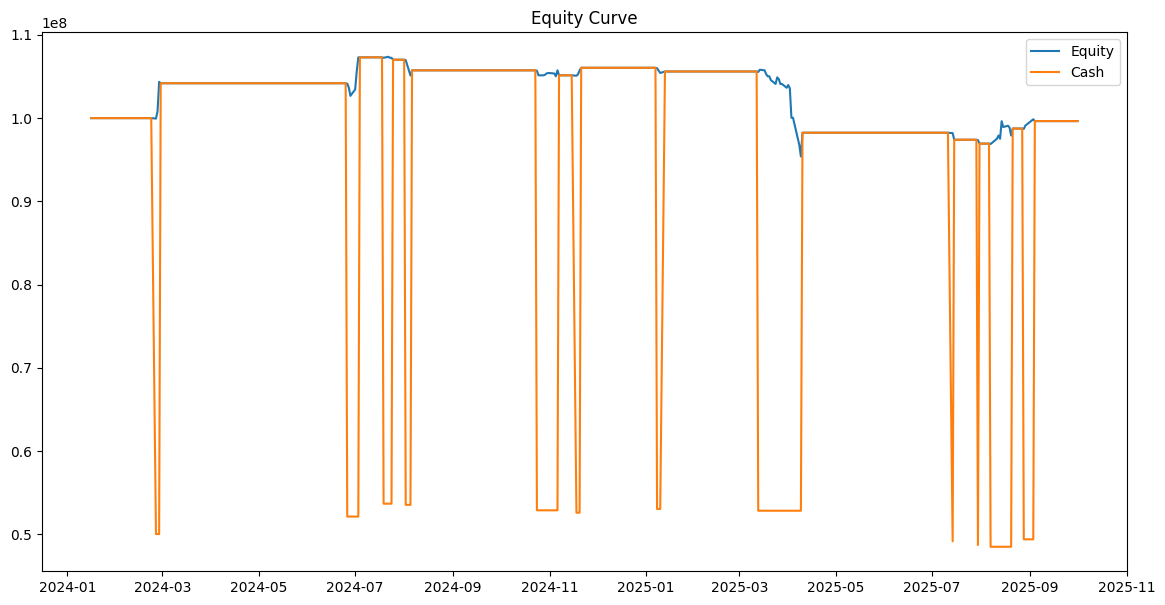

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df_bt_final.index, df_bt_final['equity'],label = 'Equity')
plt.plot(df_bt_final.index, df_bt_final['cash'],label ='Cash')
plt.title("Equity Curve")
plt.legend()
plt.show()

#4.So sánh với chỉ số VNINDEX

In [ ]:
import pandas as pd

df_bench = pd.read_csv("VNI.csv")
df_bench.rename(columns={"Ngày":"Date","Lần cuối":"Close"}, inplace=True)

# Convert datetime
df_bench["Date"] = pd.to_datetime(df_bench["Date"], format="%d/%m/%Y")

# Sort theo ngày tăng dần (rất quan trọng!)
df_bench = df_bench.sort_values("Date").reset_index(drop=True)

# Đặt index là datetime
df_bench = df_bench.set_index("Date")

# Lấy ra series giá đóng cửa
df_bench


,Close,Mở,Cao,Thấp,KL,% Thay đổi
Date,,,,,,
2015-10-01,563.54,563.39,565.63,563.23,82.59K,0.16%
2015-10-02,562.31,563.33,565.01,561.73,81.80K,-0.22%
2015-10-05,570.00,564.58,570.00,563.95,98.66K,1.37%
2015-10-06,581.29,577.45,581.38,574.63,179.24K,1.98%
2015-10-07,579.57,583.97,587.30,579.57,146.23K,-0.30%
...,...,...,...,...,...,...
2025-09-25,"1,666.09","1,657.46","1,668.21","1,654.47",914.94M,0.52%
2025-09-26,"1,660.70","1,666.09","1,671.43","1,652.65",899.32M,-0.32%
2025-09-29,"1,666.48","1,660.70","1,674.84","1,639.20",808.66M,0.35%


In [ ]:
import pandas as pd
import numpy as np

def benchmark_stats(price_series):
    """
    price_series: pandas Series giá đóng cửa benchmark (index = datetime)
    """

    # --- 1. Tính daily return ---
    ret = price_series.pct_change().dropna()

    # --- 2. CAGR ---
    n_days = len(ret)
    total_return = price_series.iloc[-1] / price_series.iloc[0] - 1
    cagr = (1 + total_return) ** (252 / n_days) - 1

    # --- 3. Volatility ---
    volatility = ret.std() * np.sqrt(252)

    # --- 4. Sharpe ---
    sharpe = cagr / volatility if volatility != 0 else np.nan

    # Kết quả
    result = {
        "Total Return (%)": round(total_return * 100, 2),
        "CAGR (%)": round(cagr * 100, 2),
        "Volatility (%)": round(volatility * 100, 2),
        "Sharpe Ratio": round(sharpe, 3),
    }

    return result, ret, price_series


In [ ]:
df_bench = pd.read_csv("VNI.csv")
df_bench.rename(columns={"Ngày":"Date","Lần cuối":"Close"}, inplace=True)
df_bench["Date"] = pd.to_datetime(df_bench["Date"], format="%d/%m/%Y")
df_bench.set_index("Date", inplace=True)
df_bench["Close"] = df_bench["Close"].astype(str).str.replace(",", "").astype(float)


In [ ]:
stats, returns, prices = benchmark_stats(df_bench["Close"])
stats


{'Total Return (%)': np.float64(-66.15),
 'CAGR (%)': np.float64(-10.35),
 'Volatility (%)': np.float64(18.41),
 'Sharpe Ratio': np.float64(-0.562)}

# Offical

## Load du lieu

In [38]:
import pandas as pd
file_name ='data_10y.csv'
data = pd.read_csv(file_name, header=[0, 1], index_col=0, parse_dates=True)

In [39]:
df_close = data['Close']
df_close = df_close.ffill

In [40]:
df_close = df_close()
split_point = int(len(df_close) * 0.8)
df_kd_train = df_close.iloc[:split_point]
df_kd_test = df_close.iloc[split_point:]

##Kiem dinh tiem cap

###Hàm

In [41]:
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.columns
    pairs = []

    print("Đang chạy kiểm định Engle-Granger...")
    for i in range(n):
        for j in range(i+1, n): # Tránh lặp lại và tự so sánh
            s1 = data[keys[i]]
            s2 = data[keys[j]]

            # Kiểm định coint từ statsmodels
            # Hàm này thực hiện cả hồi quy và kiểm định ADF trên phần dư
            result = coint(s1, s2)
            score = result[0]
            pvalue = result[1]

            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue

            if pvalue < 0.05:
                pairs.append((keys[i], keys[j], pvalue))
                print(f"Cặp đồng liên kết tìm thấy: {keys[i]} - {keys[j]} (p-value: {pvalue:.4f})")

    return score_matrix, pvalue_matrix, pairs

In [42]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np

def calc_half_life(spread):
    """Tính half-life theo OU process"""
    spread_lag = spread.shift(1).dropna()
    spread_ret = spread.diff().dropna()

    model = sm.OLS(spread_ret, sm.add_constant(spread_lag)).fit()
    beta = model.params.iloc[1]

    if beta >= 0:   # tránh log dương hoặc zero gây lỗi
        return np.inf

    halflife = -np.log(2) / beta
    return halflife


def hurst_exponent(ts):
    """Tính Hurst exponent"""
    lags = range(2, 100)
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    hurst = poly[0] * 2.0
    return hurst

###Tiến hành

Đang chạy kiểm định Engle-Granger...
Cặp đồng liên kết tìm thấy: BID.VN - VCB.VN (p-value: 0.0034)
Cặp đồng liên kết tìm thấy: CTG.VN - HPG.VN (p-value: 0.0088)
Cặp đồng liên kết tìm thấy: CTG.VN - MBB.VN (p-value: 0.0488)


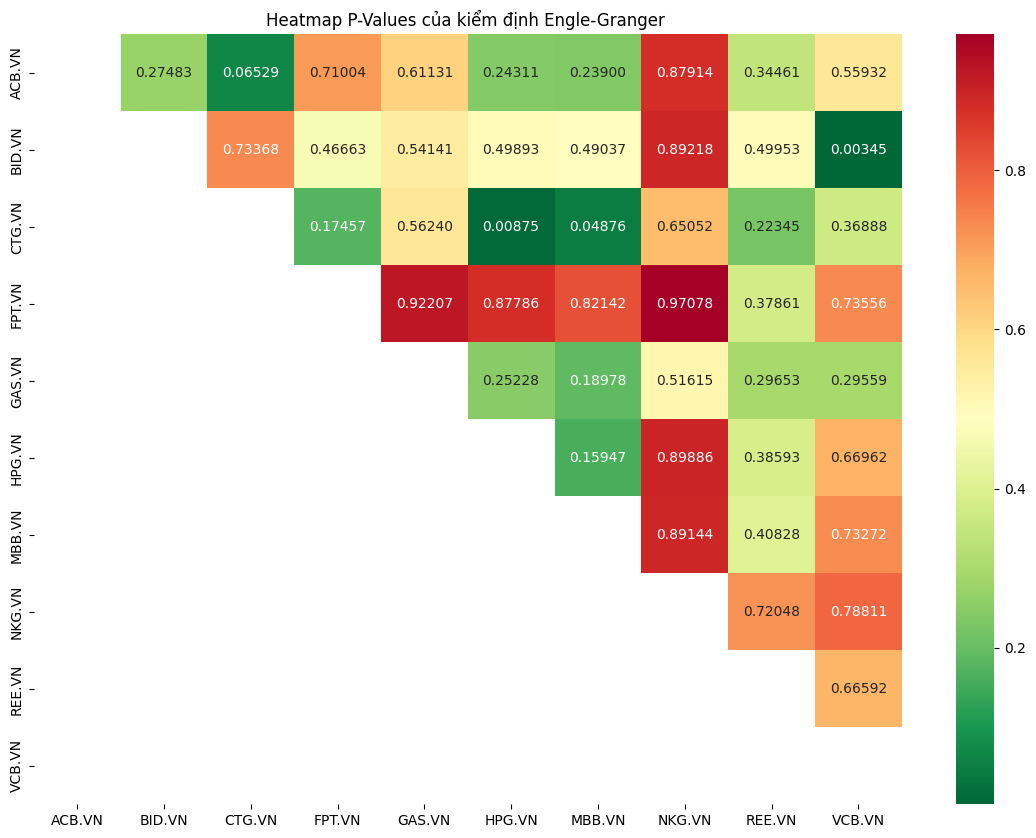

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Chạy trên dữ liệu Log Prices
df_kd_train = np.log(df_kd_train)
scores, pvalues, cointegrated_pairs = find_cointegrated_pairs(df_kd_train)

# Vẽ Heatmap P-values để dễ quan sát
plt.figure(figsize=(14, 10))
sns.heatmap(pvalues, xticklabels=df_kd_train.columns, yticklabels=df_kd_train.columns,
            cmap='RdYlGn_r', mask=(pvalues >= 0.99), annot=True, fmt=".5f")
plt.title("Heatmap P-Values của kiểm định Engle-Granger ")
plt.show()

In [44]:
# ============================================================
# KIỂM ĐỊNH TOÀN BỘ CÁC CẶP
# ============================================================

for s1, s2, p in cointegrated_pairs:
    print(f"\n=== Kiểm định cho spread {s1} - {s2} ===")

    # Use df_close which contains all columns instead of df
    y = df_kd_train[s1]
    x = df_kd_train[s2]

    # Loại bỏ NaN
    valid_idx = y.notna() & x.notna()
    y = y[valid_idx]
    x = x[valid_idx]

    # OLS để lấy residual (spread)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    resid = model.resid

    # ---- ADF TEST ----
    adf_stat, adf_pvalue, _, _, crit, _ = adfuller(resid)
    if adf_pvalue <= 0.05:
      print(f"ADF Statistic : {adf_stat:.4f}")
      print(f"ADF p-value   : {adf_pvalue:.4f}")
      print(f"Critical Values: {crit}")

      # ---- HALF-LIFE ----
      hl = calc_half_life(resid)
      print(f"Half-life     : {hl:.2f}")

      # ---- HURST EXPONENT ----
      hurst = hurst_exponent(resid.values)
      print(f"Hurst Exponent: {hurst:.4f}")
    else:
      print(f'Thất bại')


=== Kiểm định cho spread BID.VN - VCB.VN ===
ADF Statistic : -4.2159
ADF p-value   : 0.0006
Critical Values: {'1%': np.float64(-3.4336320721769433), '5%': np.float64(-2.862989840784964), '10%': np.float64(-2.56754183359401)}
Half-life     : 37.38
Hurst Exponent: 0.4212

=== Kiểm định cho spread CTG.VN - HPG.VN ===
ADF Statistic : -3.9386
ADF p-value   : 0.0018
Critical Values: {'1%': np.float64(-3.4336320721769433), '5%': np.float64(-2.862989840784964), '10%': np.float64(-2.56754183359401)}
Half-life     : 48.19
Hurst Exponent: 0.3826

=== Kiểm định cho spread CTG.VN - MBB.VN ===
ADF Statistic : -3.3474
ADF p-value   : 0.0129
Critical Values: {'1%': np.float64(-3.433648628001351), '5%': np.float64(-2.8629971502062155), '10%': np.float64(-2.5675457254979093)}
Half-life     : 76.55
Hurst Exponent: 0.4698


Dựa vào kết quả kiểm định thì nên chọn BID.VN - VCB.VN cho ngắn hạn, CTG.VN - HPG.VN cho dài hạn
- Half-life: 37.38 số ngày cần để hội tụ về mean-reversion ( càng ngắn càng đảo chiều nhanh)
- ADF p-value : chuỗi dừng với độ tin cậy
- Hurst Exponent: < 0.5 chuỗi có có xu hướng đảo chiều và nhanh chóng (càng gần 0 càng đảo mạnh) quay trở lại mức cân bằng dài hạn


##Tính các chỉ số cần thiết (chỉ có hàm)

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS # Thư viện vectorization

def pair_trading_signals(df, col1, col2, window=30):
    """
    Tối ưu hóa việc tính toán các chỉ số Pair Trading bằng RollingOLS.
    """
    df = df.copy()

    # --- 1. Log price series ---
    log1 = np.log(df[col1])
    log2 = np.log(df[col2])

    # --- 2. Rolling OLS (Vectorized) ---
    # Sử dụng log2 (X) làm biến độc lập và thêm hằng số
    X = sm.add_constant(log2)
    Y = log1

    # Khởi tạo và chạy Rolling OLS
    rols = RollingOLS(Y, X, window=window)
    rres = rols.fit()

    # Gán Beta và Alpha (mu)
    df['mu'] = rres.params['const'] # Alpha (intercept)
    df['beta'] = rres.params[col2]  # Beta (slope)

    # --- 3. Tính Spread (Phần dư) ---
    # Spread = log(P1) - alpha - beta * log(P2)
    # Ta phải điền NaN cho phần dữ liệu ban đầu (window-1 ngày)
    df['spread'] = log1 - df['mu'] * log1.apply(lambda x: 1) - df['beta'] * log2

    # Loại bỏ NaN nếu có (do không đủ window)
    df = df.dropna(subset=['beta', 'mu', 'spread'])

    # --- 4. Tính Z-score và Volatility ---
    # Lưu ý: Rolling Mean/Std của spread phải được tính trên CHÍNH SPREAD
    df['spread_mean'] = df['spread'].rolling(window).mean()
    df['spread_std'] = df['spread'].rolling(window).std()
    df['zscore'] = (df['spread'] - df['spread_mean']) / df['spread_std']
    df['spread_vol'] = df['spread_std']

    # --- Cleanup ---
    # Loại bỏ lại NaN cho rolling window đầu tiên (do mean/std cần window ngày)
    df = df.dropna(subset=['zscore', 'spread_mean'])

    return df

##Các chiến luợc (long-short, only-long)

###Long-Short

In [4]:
import pandas as pd
import numpy as np

def backtest_pair_long_short(
    df,
    col1="BID.VN",
    col2="VCB.VN",
    beta_col="beta",
    zscore_col="zscore",
    spread_vol="spread_vol",
    entry_z=1.0,
    exit_z=0.0,
    max_risk_per_trade=0.02,
    initial_cash=100_000_000,
    buy_fee=0.001,
    sell_fee=0.002,
    allow_short=False,
    # stop_loss_pct=0.05, # Tạm thời loại bỏ để đơn giản hóa quá trình tối ưu
    vol_lower=0.0005,
    vol_upper_quantile=0.95 # Dùng Quantile thay vì giá trị cố định
):

    df = df.copy()

    # SHIFT beta, zscore, volatility (Đúng - dùng dữ liệu ngày T-1 để giao dịch ngày T)
    df[beta_col] = df[beta_col].shift(1)
    df[zscore_col] = df[zscore_col].shift(1)
    df[spread_vol] = df[spread_vol].shift(1)

    cash = initial_cash
    pos1 = 0
    pos2 = 0
    prev_equity = initial_cash
    total_trades = 0

    # Khởi tạo các cột đầu ra
    df["hold1"] = 0
    df["hold2"] = 0
    df["cash"] = 0.0
    df["equity"] = 0.0
    df["daily_pnl"] = 0.0
    df["trades"] = 0

    # Tính toán ngưỡng Volatility Quantile trên dữ liệu quá khứ (LOẠI BỎ LOOK-AHEAD BIAS)
    # Tính Quantile trên cửa sổ cố định/rolling, hoặc đơn giản là dùng giá trị cố định
    # Tạm thời loại bỏ ràng buộc Volatility để tập trung vào logic đóng/mở

    # Để tránh Look-ahead Bias, ta lấy vol_upper cố định (hoặc loại bỏ hoàn toàn ràng buộc này)
    # Nếu muốn dùng ràng buộc volatility, nên tính quantile trên cửa sổ rolling

    # ****************** LƯU Ý SỬA LỖI VOLATILITY ******************
    # có thể đặt vol_upper_fixed = 0.02 nếu muốn ràng buộc.
    # **************************************************************

    for i in range(len(df)):
        price1 = float(df.iloc[i][col1])
        price2 = float(df.iloc[i][col2])
        beta = df.iloc[i][beta_col]
        z = df.iloc[i][zscore_col]
        spread_vol_i = df.iloc[i][spread_vol] # Volatility tại ngày T-1

        # Skip missing values
        if pd.isna(beta) or pd.isna(z):
            # ... (Phần này giữ nguyên) ...
            df.iloc[i, df.columns.get_loc("hold1")] = pos1
            df.iloc[i, df.columns.get_loc("hold2")] = pos2
            df.iloc[i, df.columns.get_loc("cash")] = cash
            df.iloc[i, df.columns.get_loc("equity")] = cash + pos1 * price1 + pos2 * price2
            df.iloc[i, df.columns.get_loc("daily_pnl")] = 0.0
            df.iloc[i, df.columns.get_loc("trades")] = 0
            continue

        nav = cash + pos1 * price1 + pos2 * price2
        trades_today = 0

        # -------------------------------------------------------------
        # Ràng buộc Volatility đã được sửa đổi (Fixed Upper Bound)
        # Giả định vol_upper_fixed = 0.02 (hoặc giá trị cố định bạn muốn)
        # Nếu muốn dùng vol_upper_quantile, phải tính rolling quantile
        # Tạm thời chỉ kiểm tra vol_lower để cho phép nhiều giao dịch hơn trong tối ưu
        vol_allow = spread_vol_i > vol_lower # Loại bỏ vol_upper ràng buộc Look-ahead Bias
        # -------------------------------------------------------------

        # Position sizing
        max_leg_value = nav * max_risk_per_trade

        # Đảm bảo mẫu số không bằng 0
        denominator = price1 + abs(beta) * price2
        if denominator == 0:
             qty1 = 0
        else:
             qty1 = int(max_leg_value / denominator)

        qty2 = int(qty1 * abs(beta))


        # -------------------------------------------------------------
        # LOGIC GIAO DỊCH (ENTRY)
        # -------------------------------------------------------------

        # ENTRY - High spread (z > entry_z) → short 1, long 2
        if z > entry_z and pos1 == 0 and pos2 == 0 and vol_allow:

            # ... (Logic Position Sizing và Cash Check như cũ) ...
            sell_qty1 = qty1
            buy_qty2 = qty2

            net_cash_needed = buy_qty2*price2*(1+buy_fee) - sell_qty1*price1*(1-sell_fee)
            if net_cash_needed > cash:
                factor = cash / net_cash_needed if net_cash_needed > 0 else 0
                buy_qty2 = int(buy_qty2*factor)
                sell_qty1 = int(sell_qty1*factor)

            # Thực hiện giao dịch (chỉ khi đủ cash và không vi phạm allow_short)
            if allow_short or cash >= net_cash_needed: # Kiểm tra cash thay vì pos1 >= sell_qty1
                 cash += sell_qty1*price1*(1-sell_fee)
                 pos1 -= sell_qty1 # Short pos1
                 cash -= buy_qty2*price2*(1+buy_fee)
                 pos2 += buy_qty2 # Long pos2
                 trades_today += 1

        # ENTRY - Low spread (z < -entry_z) → long 1, short 2
        elif z < -entry_z and pos1 == 0 and pos2 == 0 and vol_allow:

            # ... (Logic Position Sizing và Cash Check như cũ) ...
            buy_qty1 = qty1
            sell_qty2 = qty2

            net_cash_needed = buy_qty1*price1*(1+buy_fee) - sell_qty2*price2*(1-sell_fee)
            if net_cash_needed > cash:
                factor = cash / net_cash_needed if net_cash_needed > 0 else 0
                buy_qty1 = int(buy_qty1*factor)
                sell_qty2 = int(sell_qty2*factor)

            # Thực hiện giao dịch (chỉ khi đủ cash và không vi phạm allow_short)
            if allow_short or cash >= net_cash_needed: # Kiểm tra cash thay vì pos2 >= sell_qty2
                cash -= buy_qty1*price1*(1+buy_fee)
                pos1 += buy_qty1 # Long pos1
                cash += sell_qty2*price2*(1-sell_fee)
                pos2 -= sell_qty2 # Short pos2
                trades_today += 1

        # -------------------------------------------------------------
        # LOGIC ĐÓNG VỊ THẾ HOÀN TOÀN (EXIT) - Đã sửa lỗi đóng một phần
        # -------------------------------------------------------------
        elif abs(z) < exit_z and (pos1 != 0 or pos2 != 0): # Đã có vị thế mở

            # Số lượng đóng phải bằng vị thế đang giữ
            close_qty1 = abs(pos1)
            close_qty2 = abs(pos2)

            # Chỉ đóng nếu có đủ cash cho các giao dịch đóng/mua lại
            # Đối với Short sale (pos < 0), ta phải mua lại (cash giảm)
            # Giả định luôn có đủ cash để mua lại vị thế Short

            can_close = True # Giả định luôn có thể đóng vị thế

            if can_close:
                # Đóng Leg 1
                if pos1 > 0: # Đang Long 1 -> Bán 1
                    cash += close_qty1 * price1 * (1 - sell_fee)
                elif pos1 < 0: # Đang Short 1 -> Mua lại 1
                    cash -= close_qty1 * price1 * (1 + buy_fee)
                pos1 = 0

                # Đóng Leg 2
                if pos2 > 0: # Đang Long 2 -> Bán 2
                    cash += close_qty2 * price2 * (1 - sell_fee)
                elif pos2 < 0: # Đang Short 2 -> Mua lại 2
                    cash -= close_qty2 * price2 * (1 + buy_fee)
                pos2 = 0

                trades_today += 1 # Ghi nhận 1 giao dịch đóng

        # -------------------------------------------------------------
        # LOGIC DỪNG LỖ (SL) - Tạm thời chưa có
        # -------------------------------------------------------------
        #

        # Mark-to-market
        equity = cash + pos1*price1 + pos2*price2
        daily_pnl = equity - prev_equity
        prev_equity = equity

        # ... (Phần ghi log dữ liệu giữ nguyên) ...
        df.iloc[i, df.columns.get_loc("hold1")] = pos1
        df.iloc[i, df.columns.get_loc("hold2")] = pos2
        df.iloc[i, df.columns.get_loc("cash")] = cash
        df.iloc[i, df.columns.get_loc("equity")] = equity
        df.iloc[i, df.columns.get_loc("daily_pnl")] = daily_pnl
        df.iloc[i, df.columns.get_loc("trades")] = trades_today

        total_trades += trades_today

    # ====================================================================
    # TÍNH TOÁN HIỆU SUẤT (Giữ nguyên, logic tính đúng rồi)
    # ====================================================================
    df["return"] = df["equity"].pct_change()

    # Số ngày giao dịch thực tế (bỏ qua NaN)
    n_days = df.iloc[1:]["return"].count()

    total_return = df["equity"].iloc[-1] / initial_cash - 1

    if n_days > 0:
        # Giả sử 252 ngày giao dịch trong 1 năm
        cagr = (1 + total_return) ** (252 / n_days) - 1
        volatility = df["return"].std() * np.sqrt(252)
        sharpe = cagr / volatility if volatility != 0 else np.nan
    else:
        cagr = volatility = sharpe = np.nan

    performance = {
        "Final Equity": df["equity"].iloc[-1],
        "Net P/L": df["equity"].iloc[-1] - initial_cash,
        "Annualized Return": cagr,      # Tên cột đã được sửa để phù hợp với hàm make_objective_sharpe
        "Annualized Volatility": volatility, # Tên cột đã được sửa
        "Sharpe Ratio": sharpe,
        "Total Trades": total_trades
    }

    # Chuyển đổi sang % và làm tròn cho output in ra
    # Tuy nhiên, trả về giá trị thô (float) để tính toán chính xác trong hàm tối ưu

    # print({k: (round(v * 100, 2) if isinstance(v, (float, np.float64)) and v < 1 and k in ["Annualized Return", "Annualized Volatility"] else round(v, 2)) for k, v in performance.items() if k not in ["Final Equity", "Net P/L"]})

    # Đảm bảo trả về các chỉ số dưới dạng FLOAT chính xác:
    perf_return = {
         "Final Equity": performance["Final Equity"],
         "Net P/L": performance["Net P/L"],
         "Annualized Return": performance["Annualized Return"],
         "Annualized Volatility": performance["Annualized Volatility"],
         "Sharpe Ratio": performance["Sharpe Ratio"],
         "Total Trades": performance["Total Trades"]
    }

    return df, perf_return

###Only Long

In [ ]:
def backtest_long_only_switching(
    df, col1, col2,
    beta_col="beta", zscore_col="zscore",
    entry_z=1.0, exit_z=0.0,
    initial_cash=100_000_000,
    buy_fee=0.001, sell_fee=0.002,
    max_risk_per_trade=0.2 # Tỷ lệ NAV tối đa dùng cho mỗi giao dịch (VD: 20%)
):
    df = df.copy()
    risk_free_rate = 0.02 # Giả định lãi suất phi rủi ro

    # 1. SHIFT (Chống Look-ahead Bias)
    df[zscore_col] = df[zscore_col].shift(1)

    cash = initial_cash
    pos1 = 0
    pos2 = 0
    prev_equity = initial_cash
    total_trades = 0

    # Khởi tạo cột
    for col in ["hold1", "hold2", "cash", "equity", "daily_pnl", "trades"]:
        df[col] = 0.0

    for i in range(len(df)):
        price1 = float(df.iloc[i][col1])
        price2 = float(df.iloc[i][col2])
        z = df.iloc[i][zscore_col]

        if pd.isna(z):
            # Cập nhật trạng thái nếu NaN
            equity = cash + pos1 * price1 + pos2 * price2
            df.iloc[i, df.columns.get_loc("cash")] = cash
            df.iloc[i, df.columns.get_loc("equity")] = equity
            df.iloc[i, df.columns.get_loc("hold1")] = pos1
            df.iloc[i, df.columns.get_loc("hold2")] = pos2
            df.iloc[i, df.columns.get_loc("daily_pnl")] = 0.0
            continue

        nav = cash + pos1 * price1 + pos2 * price2
        trades_today = 0

        # 2. LOGIC ĐÓNG VỊ THẾ HOÀN TOÀN (EXIT)
        if abs(z) < exit_z and (pos1 != 0 or pos2 != 0):

            if pos1 > 0: # Đang Long 1 -> Bán 1
                close_qty = pos1
                cash += close_qty * price1 * (1 - sell_fee)
                pos1 = 0
                trades_today += 1

            if pos2 > 0: # Đang Long 2 -> Bán 2
                close_qty = pos2
                cash += close_qty * price2 * (1 - sell_fee)
                pos2 = 0
                trades_today += 1

        # 3. LOGIC MỞ VỊ THẾ (ENTRY) - Chỉ mở khi đang KHÔNG có vị thế nào
        elif abs(z) >= entry_z and pos1 == 0 and pos2 == 0:

            # QUẢN LÝ VỐN: Dùng max_risk_per_trade của NAV hiện tại
            capital_to_use = nav * max_risk_per_trade
            investment_amount = min(capital_to_use, cash) # Không vượt quá Cash

            # Entry 1: Z < -entry_z (Long Leg 1 - Mua cổ phiếu 1)
            if z <= -entry_z:
                qty1 = int(investment_amount / (price1 * (1 + buy_fee)))
                if qty1 > 0:
                    cash -= qty1 * price1 * (1 + buy_fee)
                    pos1 += qty1
                    trades_today += 1

            # Entry 2: Z > entry_z (Long Leg 2 - Mua cổ phiếu 2)
            elif z >= entry_z:
                qty2 = int(investment_amount / (price2 * (1 + buy_fee)))
                if qty2 > 0:
                    cash -= qty2 * price2 * (1 + buy_fee)
                    pos2 += qty2
                    trades_today += 1

        # 4. Mark-to-market và Ghi log
        equity = cash + pos1*price1 + pos2*price2
        daily_pnl = equity - prev_equity
        prev_equity = equity

        df.iloc[i, df.columns.get_loc("cash")] = cash
        df.iloc[i, df.columns.get_loc("equity")] = equity
        df.iloc[i, df.columns.get_loc("hold1")] = pos1
        df.iloc[i, df.columns.get_loc("hold2")] = pos2
        df.iloc[i, df.columns.get_loc("daily_pnl")] = daily_pnl
        df.iloc[i, df.columns.get_loc("trades")] = trades_today

        total_trades += trades_today

    # 5. Tính Hiệu suất Cuối cùng
    df["return"] = df["equity"].pct_change()
    n_days = df["return"].count()
    total_return = df["equity"].iloc[-1] / initial_cash - 1

    if n_days > 0:
        cagr = (1 + total_return) ** (252 / n_days) - 1
        volatility = df["return"].std() * np.sqrt(252)
        sharpe = (cagr - risk_free_rate) / volatility if volatility != 0 else np.nan
    else:
        cagr = volatility = sharpe = np.nan

    performance = {
        "Final Equity": df["equity"].iloc[-1],
        "Net P/L": df["equity"].iloc[-1] - initial_cash,
        "Annualized Return": cagr,
        "Annualized Volatility": volatility,
        "Sharpe Ratio": sharpe,
        "Total Trades": total_trades
    }

    return df, performance

##Tối ưu tham số

In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.4 MB/s eta 0:00:00


In [23]:
import optuna
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import warnings

warnings.filterwarnings("ignore")

def optimize_pair_optuna(
    df,
    col1="BID.VN",
    col2="VCB.VN",
    n_trials=40,
    n_splits=4,
    initial_cash=100_000_000,
    min_trade = 20
):
    print("\nRunning Optuna optimization...")

    tscv = TimeSeriesSplit(n_splits=n_splits)

    def objective(trial, allow_short):

        # ==============================
        # Sample tham số cần tối ưu
        # ==============================
        window      = trial.suggest_int("window", 25, 40)
        entry_z     = trial.suggest_float("entry_z", 1.5, 3.0)
        exit_z      = trial.suggest_float("exit_z", 0.3, 1.5)
        max_risk    = trial.suggest_float("max_risk_per_trade", 0.05, 0.4)
        vol_lower   = trial.suggest_float("vol_lower", 0.0003, 0.002)

        sharpe_scores = []

        # ==============================
        # Time-Series CV
        # ==============================
        for fold, (train_idx, test_idx) in enumerate(tscv.split(df)):

            df_train = df.iloc[train_idx].copy()
            df_test = df.iloc[test_idx].copy()

            # Tính tín hiệu trên train + test (để không thiếu data rolling)
            df_total = pair_trading_signals(pd.concat([df_train, df_test], axis=0)
                                               ,col1
                                               ,col2
                                               ,window)

            # Lấy đúng đoạn test để backtest
            df_sig_test = df_total.iloc[len(df_train):].copy()

            try:
                _, perf = backtest_pair_long_short(
                    df_sig_test,
                    col1=col1,
                    col2=col2,
                    entry_z=entry_z,
                    exit_z=exit_z,
                    max_risk_per_trade=max_risk,
                    allow_short=allow_short,
                    vol_lower=vol_lower,
                    initial_cash=initial_cash
                )

                sharpe = perf["Sharpe Ratio"]

                # Loại fold lỗi hoặc quá ít giao dịch
                if np.isnan(sharpe) or perf["Total Trades"] < min_trade:
                    return -999

                sharpe_scores.append(sharpe)

            except Exception:
                return -999

        return np.mean(sharpe_scores)

    # =====================================
    # Tạo 2 study: Long-Short & Only-Long
    # =====================================
    studies = {}
    modes = {"LS": True, "ONLY_LONG": False}

    for mode, allow_short in modes.items():

        study = optuna.create_study(
            direction="maximize",
            sampler=optuna.samplers.TPESampler(seed=42)
        )

        print(f"\nOptimizing mode: {mode}")
        study.optimize(lambda trial: objective(trial, allow_short), n_trials=n_trials)

        studies[mode] = study

    # =====================================
    # Chọn mode tốt nhất
    # =====================================
    best_mode = max(studies, key=lambda m: studies[m].best_value)
    best_study = studies[best_mode]

    print("\nTối ưu hoàn tất!")
    print(f"Best Mode: {best_mode}")
    print(f"Best Sharpe: {best_study.best_value:.4f}")
    print(f"Best Params: {best_study.best_params}")

    return best_mode, best_study.best_params, studies


##BID.VN - VCB.VN
- ngắn hạn hơn nhưng hurst nhỏ: kiếm được lời ít hơn trong khoảng thời gian ngắn hơn

In [55]:
import pandas as pd
# 2 cols lấy từ cặp kiểm định có thể tùy chỉnh
col1, col2 = 'BID.VN','VCB.VN'
data = pd.read_csv('data_10y.csv', header=[0, 1], index_col=0, parse_dates=True)
df = pd.DataFrame({
    col1: data['Close'][col1],
    col2: data['Close'][col2]
})

df = df.ffill()
split_point = int(len(df) * 0.8)
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

In [56]:
best_mode, best_params, all_studies = optimize_pair_optuna(
    df_train, # tập này bị tách thành train - validation
    col1= col1,
    col2= col2,
    n_trials=50 #,min_trade được điều chỉnh dựa trên thời gian test
)


[I 2025-12-13 02:46:36,593] A new study created in memory with name: no-name-a325f29d-3da1-4a51-8262-be1d4fe4c54f



Running Optuna optimization...

Optimizing mode: LS


[I 2025-12-13 02:46:37,615] Trial 0 finished with value: -999.0 and parameters: {'window': 30, 'entry_z': 2.9260714596148745, 'exit_z': 1.178392730173686, 'max_risk_per_trade': 0.25953046946896285, 'vol_lower': 0.0005652316887521421}. Best is trial 0 with value: -999.0.
[I 2025-12-13 02:46:42,979] Trial 1 finished with value: -0.016625285803176515 and parameters: {'window': 27, 'entry_z': 1.5871254182522991, 'exit_z': 1.3394113749299221, 'max_risk_per_trade': 0.2603902541101231, 'vol_lower': 0.0015037233822532774}. Best is trial 1 with value: -0.016625285803176515.
[I 2025-12-13 02:46:44,429] Trial 2 finished with value: -999.0 and parameters: {'window': 25, 'entry_z': 2.9548647782429915, 'exit_z': 1.298931168960506, 'max_risk_per_trade': 0.12431868873739667, 'vol_lower': 0.000609102444252071}. Best is trial 1 with value: -0.016625285803176515.
[I 2025-12-13 02:46:47,737] Trial 3 finished with value: 0.3512515345562328 and parameters: {'window': 27, 'entry_z': 1.9563633644393066, 'exit


Optimizing mode: ONLY_LONG


[I 2025-12-13 02:48:21,628] Trial 0 finished with value: -999.0 and parameters: {'window': 30, 'entry_z': 2.9260714596148745, 'exit_z': 1.178392730173686, 'max_risk_per_trade': 0.25953046946896285, 'vol_lower': 0.0005652316887521421}. Best is trial 0 with value: -999.0.
[I 2025-12-13 02:48:24,913] Trial 1 finished with value: -0.016625285803176515 and parameters: {'window': 27, 'entry_z': 1.5871254182522991, 'exit_z': 1.3394113749299221, 'max_risk_per_trade': 0.2603902541101231, 'vol_lower': 0.0015037233822532774}. Best is trial 1 with value: -0.016625285803176515.
[I 2025-12-13 02:48:25,474] Trial 2 finished with value: -999.0 and parameters: {'window': 25, 'entry_z': 2.9548647782429915, 'exit_z': 1.298931168960506, 'max_risk_per_trade': 0.12431868873739667, 'vol_lower': 0.000609102444252071}. Best is trial 1 with value: -0.016625285803176515.
[I 2025-12-13 02:48:27,862] Trial 3 finished with value: 0.3512515345562328 and parameters: {'window': 27, 'entry_z': 1.9563633644393066, 'exit


Tối ưu hoàn tất!
Best Mode: LS
Best Sharpe: 0.6255
Best Params: {'window': 28, 'entry_z': 2.0415714362090887, 'exit_z': 1.0497506947390534, 'max_risk_per_trade': 0.18816412373268512, 'vol_lower': 0.00139795594919551}


In [57]:
df_sig = pair_trading_signals(df_test, col1, col2, window=best_params["window"])

df_res, final_perf = backtest_pair_long_short(
    df_sig,
    entry_z=best_params["entry_z"],
    exit_z=best_params["exit_z"],
    max_risk_per_trade=best_params["max_risk_per_trade"],
    allow_short = (best_mode == "LS"),
)

print(final_perf)


{'Final Equity': np.float64(100832232.11816806), 'Net P/L': np.float64(832232.118168056), 'Annualized Return': np.float64(0.004704393246909522), 'Annualized Volatility': np.float64(0.016224739645043337), 'Sharpe Ratio': np.float64(0.2899518482163574), 'Total Trades': 32}


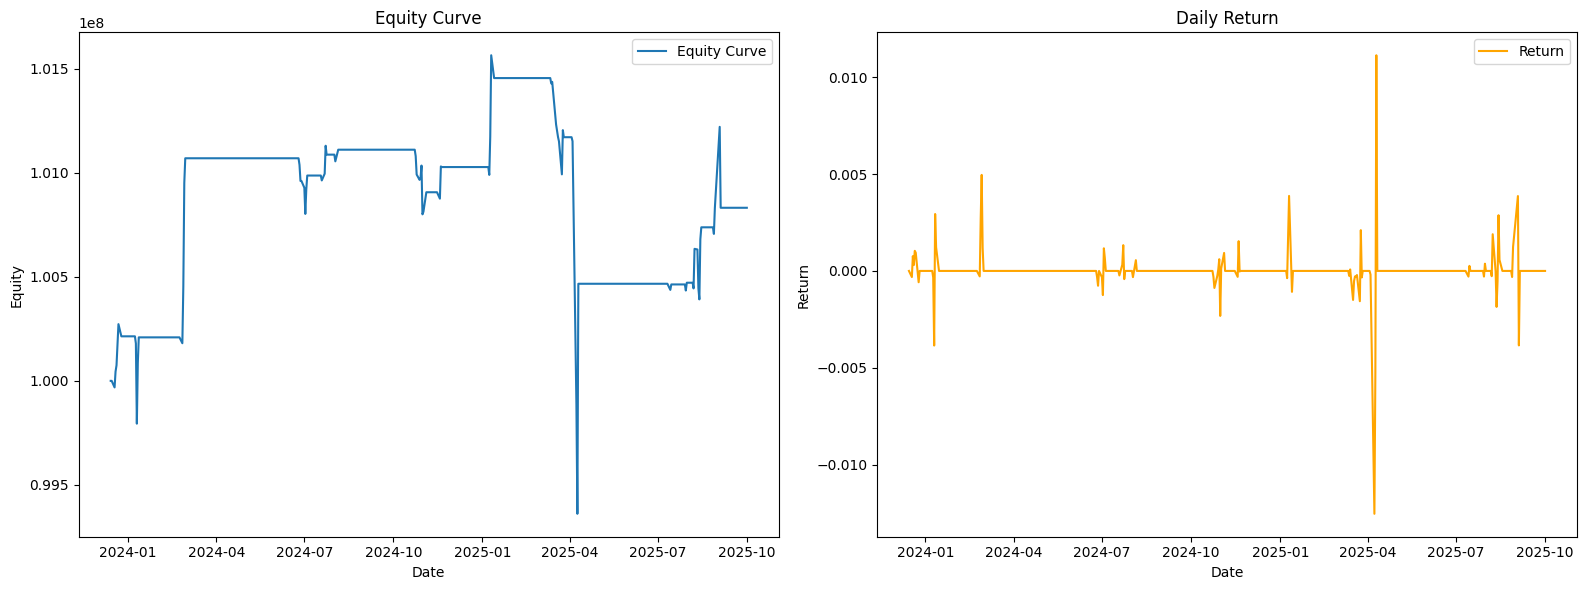

In [58]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Equity Curve on the first subplot
axes[0].plot(df_res["equity"], label='Equity Curve')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Equity')
axes[0].set_title('Equity Curve')
axes[0].legend()

# Plot Return on the second subplot
axes[1].plot(df_res["return"], label='Return', color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Return')
axes[1].set_title('Daily Return')
axes[1].legend()

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## CTG.VN - HPG.VN

In [27]:
import pandas as pd
# 2 cols lấy từ cặp kiểm định có thể tùy chỉnh
col1, col2 = 'CTG.VN','HPG.VN'
data = pd.read_csv('data_10y.csv', header=[0, 1], index_col=0, parse_dates=True)
df = pd.DataFrame({
    col1: data['Close'][col1],
    col2: data['Close'][col2]
})

df = df.ffill()
split_point = int(len(df) * 0.8)
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

In [28]:
best_mode, best_params, all_studies = optimize_pair_optuna(
    df_train, # tập này bị tách thành train - validation
    col1= col1,
    col2= col2,
    n_trials=50,# min_trade phải được chỉnh sửa theo thời gian hoạt động, trường hợp 2 năm thì cỡ 20
)

[I 2025-12-13 02:32:20,672] A new study created in memory with name: no-name-60964d4f-7332-4230-86c2-da12758d2d07



Running Optuna optimization...

Optimizing mode: LS


[I 2025-12-13 02:32:22,580] Trial 0 finished with value: -999.0 and parameters: {'window': 30, 'entry_z': 2.9260714596148745, 'exit_z': 1.178392730173686, 'max_risk_per_trade': 0.25953046946896285, 'vol_lower': 0.0005652316887521421}. Best is trial 0 with value: -999.0.
[I 2025-12-13 02:32:26,888] Trial 1 finished with value: -0.8302900657629548 and parameters: {'window': 27, 'entry_z': 1.5871254182522991, 'exit_z': 1.3394113749299221, 'max_risk_per_trade': 0.2603902541101231, 'vol_lower': 0.0015037233822532774}. Best is trial 1 with value: -0.8302900657629548.
[I 2025-12-13 02:32:27,457] Trial 2 finished with value: -999.0 and parameters: {'window': 25, 'entry_z': 2.9548647782429915, 'exit_z': 1.298931168960506, 'max_risk_per_trade': 0.12431868873739667, 'vol_lower': 0.000609102444252071}. Best is trial 1 with value: -0.8302900657629548.
[I 2025-12-13 02:32:28,000] Trial 3 finished with value: -999.0 and parameters: {'window': 27, 'entry_z': 1.9563633644393066, 'exit_z': 0.92970771795


Optimizing mode: ONLY_LONG


[I 2025-12-13 02:33:39,740] Trial 0 finished with value: -999.0 and parameters: {'window': 30, 'entry_z': 2.9260714596148745, 'exit_z': 1.178392730173686, 'max_risk_per_trade': 0.25953046946896285, 'vol_lower': 0.0005652316887521421}. Best is trial 0 with value: -999.0.
[I 2025-12-13 02:33:42,199] Trial 1 finished with value: -0.8302900657629548 and parameters: {'window': 27, 'entry_z': 1.5871254182522991, 'exit_z': 1.3394113749299221, 'max_risk_per_trade': 0.2603902541101231, 'vol_lower': 0.0015037233822532774}. Best is trial 1 with value: -0.8302900657629548.
[I 2025-12-13 02:33:42,748] Trial 2 finished with value: -999.0 and parameters: {'window': 25, 'entry_z': 2.9548647782429915, 'exit_z': 1.298931168960506, 'max_risk_per_trade': 0.12431868873739667, 'vol_lower': 0.000609102444252071}. Best is trial 1 with value: -0.8302900657629548.
[I 2025-12-13 02:33:43,297] Trial 3 finished with value: -999.0 and parameters: {'window': 27, 'entry_z': 1.9563633644393066, 'exit_z': 0.92970771795


Tối ưu hoàn tất!
Best Mode: LS
Best Sharpe: -0.3531
Best Params: {'window': 28, 'entry_z': 1.8270076362516685, 'exit_z': 0.9880206121036871, 'max_risk_per_trade': 0.12567159067377495, 'vol_lower': 0.00038559473860394234}


In [45]:
df_sig = pair_trading_signals(df_test, col1, col2, window=best_params["window"])

df_res, final_perf = backtest_pair_long_short(
    df_sig,
    col1,
    col2,
    entry_z=best_params["entry_z"],
    exit_z=best_params["exit_z"],
    max_risk_per_trade=best_params["max_risk_per_trade"],
    allow_short = (best_mode == "LS"),
)

print(final_perf)


{'Final Equity': np.float64(98799988.18810353), 'Net P/L': np.float64(-1200011.8118964732), 'Annualized Return': np.float64(-0.006813358603340425), 'Annualized Volatility': np.float64(0.011701699519177019), 'Sharpe Ratio': np.float64(-0.582253765119719), 'Total Trades': 36}


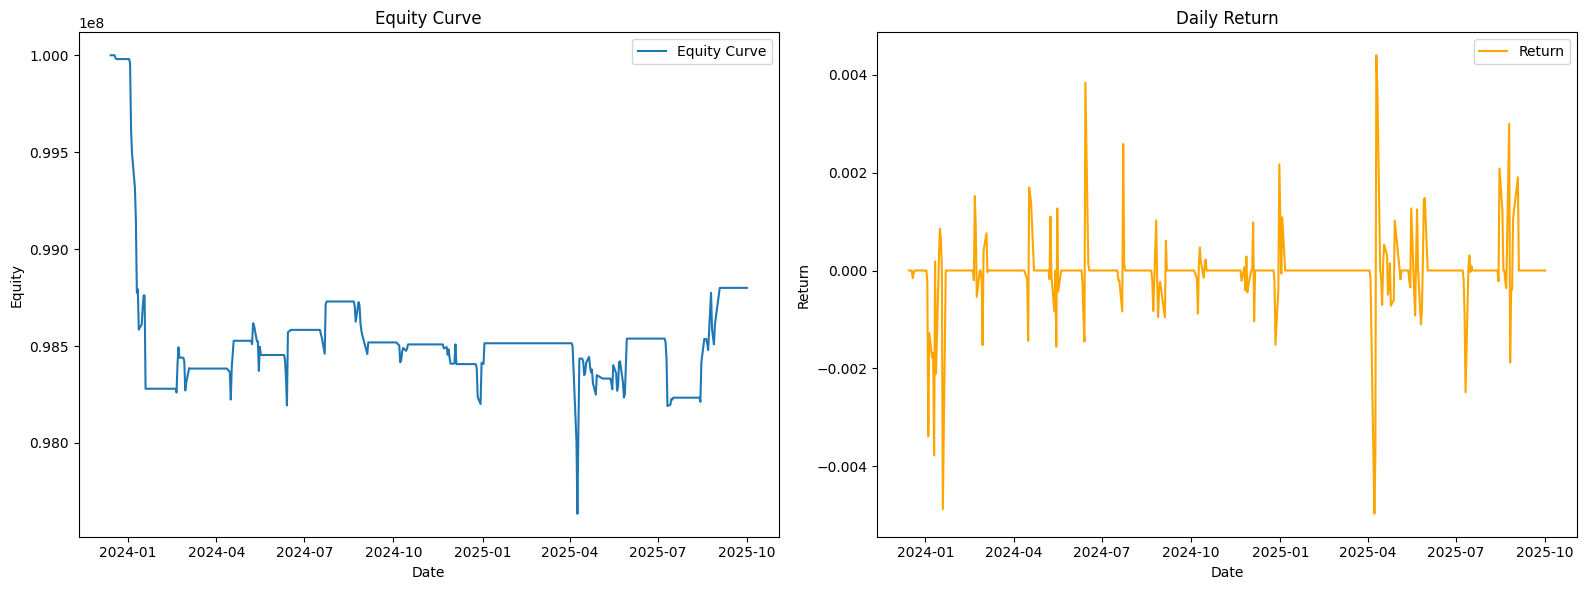

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Equity Curve on the first subplot
axes[0].plot(df_res["equity"], label='Equity Curve')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Equity')
axes[0].set_title('Equity Curve')
axes[0].legend()

# Plot Return on the second subplot
axes[1].plot(df_res["return"], label='Return', color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Return')
axes[1].set_title('Daily Return')
axes[1].legend()

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

##Trade đổi cặp (unfinished)

Lý thuyết Pair Trading :

- Khi cointegration bị phá vỡ

  - p-value ADF > 0.05 → không còn mean-reverting

  - Hurst > 0.5 → trending

  - Half-life > 80 → mean reversion quá chậm

- Khi hiệu suất giao dịch quá kém

  - Drawdown > 10-20%

  - Sharpe < 0 trong 60 ngày

  - Số tín hiệu giảm (volatility spread thấp bất thường)

- Khi có cặp tốt hơn xuất hiện

  - Kiểm tra danh sách cặp candidate

  - Chọn cặp có p-value nhỏ nhất

  - Hurst < 0.5

  - Half-life nhỏ nhất

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm

# ==========================================
# PRECOMPUTE COINTEGRATION METRICS FOR ALL PAIRS
# ==========================================
def precompute_metrics(df, pairs, window=60):
    metrics_cache = {}

    for col1, col2 in tqdm(pairs, desc="Precomputing metrics"):

        spread = df[col1] - df[col2]

        adf_list = []
        hurst_list = []
        hl_list = []

        # Rolling windows
        for i in range(len(df)):
            if i < window:
                adf_list.append(np.nan)
                hurst_list.append(np.nan)
                hl_list.append(np.nan)
                continue

            sp = spread.iloc[i-window:i].dropna()
            if len(sp) < window * 0.8:
                adf_list.append(np.nan)
                hurst_list.append(np.nan)
                hl_list.append(np.nan)
                continue

            # ====== ADF ======
            try:
                adf_stat, adf_p, _, _, _, _ = adfuller(sp, autolag="AIC")
            except:
                adf_p = np.nan

            # ====== Hurst ======
            try:
                lags = range(2, 50)
                tau = [np.sqrt(np.std(np.subtract(sp[l:], sp[:-l]))) for l in lags]
                poly = np.polyfit(np.log(lags), np.log(tau), 1)
                hurst = poly[0] * 2.0
            except:
                hurst = np.nan

            # ====== Half-life ======
            try:
                lagged = sp.shift(1).dropna()
                delta = sp.diff().dropna()

                model = sm.OLS(delta, sm.add_constant(lagged)).fit()
                hl = -np.log(2) / model.params[1]
            except:
                hl = np.nan

            adf_list.append(adf_p)
            hurst_list.append(hurst)
            hl_list.append(hl)

        metrics_cache[(col1, col2)] = pd.DataFrame({
            "adf_p": adf_list,
            "hurst": hurst_list,
            "half_life": hl_list
        })

    return metrics_cache


In [ ]:
def backtest_pair_dynamic_switching(
    df,
    pairs,
    metrics_cache,
    window,
    entry_z,
    exit_z,
    max_risk_per_trade,
    drawdown_limit,
    sharpe_limit,
    initial_cash=100_000_000
):
    equity_curve = []
    trade_log = []

    position = 0
    pnl = 0
    entry_spread = None
    current_pair = None

    # -----------------------------------------
    # Select best pair using precomputed metrics
    # -----------------------------------------
    def pick_pair(i):
        scores = []

        for col1, col2 in pairs:
            m = metrics_cache[(col1, col2)].iloc[i]

            if pd.isna(m.adf_p) or pd.isna(m.hurst) or pd.isna(m.half_life):
                continue

            if m.adf_p < 0.05 and m.hurst < 0.5 and m.half_life < 80:
                scores.append((m.adf_p, m.half_life, col1, col2))

        if len(scores) == 0:
            return None

        scores.sort(key=lambda x: (x[0], x[1]))  # adf_p, hl
        _, _, c1, c2 = scores[0]
        return c1, c2

    # -----------------------------------------
    # MAIN BACKTEST LOOP
    # -----------------------------------------
    for i in range(window, len(df)):
        eq = initial_cash + pnl
        equity_curve.append(eq)

        # Pick pair if none
        if current_pair is None:
            current_pair = pick_pair(i)
            continue

        col1, col2 = current_pair

        # --- Compute beta using recent window ---
        win = df[[col1, col2]].iloc[i-window:i].dropna()
        beta = np.polyfit(win[col2], win[col1], 1)[0]

        # --- Compute spread + z-score ---
        spread_series = df[col1] - beta * df[col2]
        sp_win = spread_series.iloc[i-window:i]
        mean, std = sp_win.mean(), sp_win.std()
        z = (spread_series.iloc[i] - mean) / (std + 1e-9)

        # --- Automatic switching ---
        m = metrics_cache[(col1, col2)].iloc[i]
        if m.adf_p > 0.05 or m.hurst > 0.5 or m.half_life > 80:
            current_pair = pick_pair(i)
            position = 0
            continue

        # --- Performance filters ---
        if len(equity_curve) > 60:
            series = pd.Series(equity_curve)
            ret60 = series.diff().iloc[-60:]
            sharpe = ret60.mean() / (ret60.std() + 1e-9)
            dd = (series.max() - series.iloc[-1]) / series.max()

            if sharpe < sharpe_limit or dd > drawdown_limit:
                current_pair = pick_pair(i)
                position = 0
                continue

        # --- Risk budget ---
        cash = equity_curve[-1]
        pos_value = cash * max_risk_per_trade

        # --------------------------
        # ENTRY
        # --------------------------
        if position == 0:
            if z > entry_z:
                position = -pos_value     # short spread
                entry_spread = spread_series.iloc[i]

            elif z < -entry_z:
                position = +pos_value     # long spread
                entry_spread = spread_series.iloc[i]

        # --------------------------
        # EXIT
        # --------------------------
        else:
            if abs(z) < exit_z:
                profit = (entry_spread - spread_series.iloc[i]) * np.sign(position) * (abs(position)/1_000_000)
                pnl += profit

                trade_log.append({
                    "pair": f"{col1}-{col2}",
                    "pnl": profit,
                    "index": i,
                    "side": "LONG" if position > 0 else "SHORT"
                })

                position = 0

    # -----------------------------------------
    # PERFORMANCE
    # -----------------------------------------
    eq = pd.Series(equity_curve)
    years = len(eq) / 252

    performance = {
        "Final Equity": eq.iloc[-1],
        "Net P/L": eq.iloc[-1] - initial_cash,
        "Annualized Return": (eq.iloc[-1] / initial_cash) ** (1/years) - 1,
        "Annualized Volatility": eq.pct_change().std() * np.sqrt(252),
        "Sharpe Ratio": eq.pct_change().mean() / (eq.pct_change().std() + 1e-9) * np.sqrt(252),
        "Total Trades": len(trade_log),
    }

    return {
        "equity_curve": eq,
        "trade_log": pd.DataFrame(trade_log),
        "performance": performance
    }


In [ ]:
import optuna

def optimize_dynamic_pair(
    df,
    pairs,
    metrics_cache,
    n_trials=20
):

    def objective(trial):
        window = trial.suggest_int("window", 30, 120)
        entry_z = trial.suggest_float("entry_z", 1.5, 3.5)
        exit_z = trial.suggest_float("exit_z", 0.3, 1.5)
        max_risk_per_trade = trial.suggest_float("max_risk_per_trade", 0.01, 0.25)
        drawdown_limit = trial.suggest_float("drawdown_limit", 0.05, 0.25)
        sharpe_limit = trial.suggest_float("sharpe_limit", -1, 1)

        result = backtest_pair_dynamic_switching(
            df=df,
            pairs=pairs,
            metrics_cache=metrics_cache,
            window=window,
            entry_z=entry_z,
            exit_z=exit_z,
            max_risk_per_trade=max_risk_per_trade,
            drawdown_limit=drawdown_limit,
            sharpe_limit=sharpe_limit
        )

        return result["performance"]["Sharpe Ratio"]

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    return study.best_params, study.best_value, study


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# =====================================================
# 1. HÀM TÍNH COINTEGRATION (ADF, Hurst, Half-life)
# =====================================================
def calc_cointegration_metrics(spread):
    spread = spread.dropna()

    # Không đủ dữ liệu → trả về giá trị "xấu" để bị loại
    if len(spread) < 20:
        return 1.0, 1.0, 999.0   # adf_p cao, hurst > 0.5, half-life quá lớn

    # ADF test
    try:
        adf_stat, adf_p, _, _, critical, _ = adfuller(spread, autolag='AIC')
    except:
        return 1.0, 1.0, 999.0

    # Hurst exponent
    try:
        lags = range(2, min(100, len(spread) - 1))
        tau = [np.sqrt(np.std(np.subtract(spread[l:], spread[:-l]))) for l in lags]
        poly = np.polyfit(np.log(lags), np.log(tau), 1)
        hurst = poly[0] * 2.0
    except:
        hurst = 1.0

    # Half-life
    try:
        spread_lag = spread.shift(1)
        spread_lag.iloc[0] = spread_lag.iloc[1]  #Không lỗi vì spread >= 20
        delta = spread - spread_lag
        model = sm.OLS(delta[1:], sm.add_constant(spread_lag[1:])).fit()
        halflife = -np.log(2) / model.params[1]
    except:
        halflife = 999.0

    return adf_p, hurst, halflife

# =====================================================
# 2. HÀM CHỌN CẶP TỐT NHẤT
# =====================================================
def select_best_pair(df, pairs, i, window):
    metrics = []
    for col1, col2 in pairs:
        spread = df[col1] - df[col2]
        sp = spread.iloc[i-window:i].dropna()

        if len(sp) < window * 0.8:
            continue

        adf_p, hurst, hl = calc_cointegration_metrics(sp)
        metrics.append({
            "pair": (col1, col2),
            "adf_p": adf_p,
            "hurst": hurst,
            "half_life": hl
        })

    if len(metrics) == 0:
        return None

    m = pd.DataFrame(metrics)
    m = m[(m["adf_p"] < 0.05) & (m["hurst"] < 0.5) & (m["half_life"] < 80)]

    if len(m) == 0:
        return None

    m = m.sort_values(["adf_p", "half_life"])
    return tuple(m.iloc[0]["pair"])

# =====================================================
# 3. HÀM BACKTEST FULL
# =====================================================
def backtest_pair_dynamic_switching(
    df,
    pairs,
    window=60,
    entry_z=2.0,
    exit_z=0.5,
    max_risk=0.1,
    initial_cash=1_000_000
):
    df = df.reset_index(drop=True)
    equity = initial_cash
    equity_curve = []
    trade_log = []

    position = 0
    entry_spread = None
    current_pair = None

    for i in range(window, len(df)):

        # Switch nếu không có cặp
        if current_pair is None:
            current_pair = select_best_pair(df, pairs, i, window)
            equity_curve.append(equity)
            continue

        col1, col2 = current_pair

        spread = df[col1] - df[col2]
        sp = spread.iloc[i-window:i]
        mean = sp.mean()
        std = sp.std()
        z = (spread.iloc[i] - mean) / std

        # Cointegration check
        adf_p, hurst, hl = calc_cointegration_metrics(sp)
        if adf_p > 0.05 or hurst > 0.5 or hl > 80:
            current_pair = select_best_pair(df, pairs, i, window)
            position = 0
            equity_curve.append(equity)
            continue

        # ---- ENTRY ----
        if position == 0:
            if z > entry_z:
                position = -1
                entry_spread = spread.iloc[i]
            elif z < -entry_z:
                position = +1
                entry_spread = spread.iloc[i]

        # ---- EXIT ----
        else:
            if abs(z) < exit_z:
                pnl = position * (entry_spread - spread.iloc[i])
                pnl = max(min(pnl, equity * max_risk), -equity * max_risk)

                equity += pnl

                trade_log.append({
                    "pair": f"{col1}-{col2}",
                    "pos": "LONG" if position == 1 else "SHORT",
                    "entry": float(entry_spread),
                    "exit": float(spread.iloc[i]),
                    "pnl": float(pnl)
                })
                position = 0

        # Mark-to-market
        if position != 0:
            mtm = position * (entry_spread - spread.iloc[i])
            mtm = max(min(mtm, equity * max_risk), -equity * max_risk)
            equity_curve.append(equity + mtm)
        else:
            equity_curve.append(equity)

    return pd.Series(equity_curve), pd.DataFrame(trade_log)

# =====================================================
# 4. TẠO DỮ LIỆU GIẢ ĐỂ TEST
# =====================================================
np.random.seed(42)
n = 500

spread_ab = np.random.normal(0,1,n).cumsum()
df = pd.DataFrame({
    "A": spread_ab + np.random.normal(0,0.2,n),
    "B": spread_ab + np.random.normal(0,0.2,n),
})

spread_cd = np.random.normal(0,1,n).cumsum()*1.8
df["C"] = spread_cd + np.random.normal(0,0.3,n)
df["D"] = spread_cd + np.random.normal(0,0.3,n)

pairs = [("A","B"), ("C","D")]

# =====================================================
# 5. CHẠY THỬ 1 LẦN
# =====================================================
equity, log = backtest_pair_dynamic_switching(df, pairs)

print("=== PERFORMANCE ===")
print(f"Final Equity: {equity.iloc[-1]:,.2f}")
print(f"Net P/L: {equity.iloc[-1] - 1_000_000:,.2f}")
print("Total trades:", len(log))

print("\n=== TRADE LOG (5 dòng đầu) ===")
print(log.head())


=== PERFORMANCE ===
Final Equity: 1,000,000.00
Net P/L: 0.00
Total trades: 0

=== TRADE LOG (5 dòng đầu) ===
Empty DataFrame
Columns: []
Index: []


#Nháp

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
import optuna
import warnings
warnings.filterwarnings("ignore")


# -------------------------
# Helpers: cointegration metrics, rolling beta
# -------------------------
def calc_cointegration_metrics(spread_series):
    s = spread_series.dropna()
    if len(s) < 10:
        return 1.0, np.nan, np.inf

    try:
        _, pvalue, _, _, _, _ = adfuller(s, autolag="AIC")
    except Exception:
        pvalue = 1.0

    # Hurst (simple)
    try:
        lags = range(2, min(100, len(s)//2 + 2))
        tau = [np.sqrt(np.std(np.subtract(s[l:], s[:-l]))) for l in lags]
        poly = np.polyfit(np.log(lags), np.log(tau), 1)
        hurst = float(poly[0] * 2.0)
    except Exception:
        hurst = np.nan

    # half-life
    try:
        s_lag = s.shift(1)
        s_lag.iloc[0] = s_lag.iloc[1]
        delta = s - s_lag
        model = sm.OLS(delta[1:], sm.add_constant(s_lag[1:])).fit()
        theta = model.params[1]
        halflife = -np.log(2) / theta if theta < 0 else np.inf
    except Exception:
        halflife = np.inf

    return pvalue, hurst, halflife


def rolling_beta(y_series, x_series):
    """
    OLS beta for y = alpha + beta * x on two pd.Series (aligned).
    Return np.nan if not enough data or failure.
    """
    y = y_series.dropna()
    x = x_series.dropna()
    if len(y) < 8 or len(x) < 8 or len(y) != len(x):
        return np.nan
    X = sm.add_constant(x)
    try:
        model = sm.OLS(y, X).fit()
        return float(model.params[1])
    except Exception:
        return np.nan


# -------------------------
# Main backtest: dynamic switching with beta + sizing
# -------------------------
def backtest_pair_dynamic_switching(
    df,                    # price DataFrame (columns = tickers)
    pairs,                 # list of candidate tuples [('A','B'), ...]
    window=60,             # rolling window for beta & stats
    entry_z=2.0,
    exit_z=0.5,
    drawdown_limit=0.15,
    sharpe_limit=0.0,
    initial_cash=100_000_000,
    max_risk_per_trade=0.02,
    buy_fee=0.001,         # per-leg fee placeholders (not split per leg here)
    sell_fee=0.002,
    min_history_frac=0.8,
    debug=False
):
    """
    Returns: { 'equity_curve': pd.Series (indexed from df.index[window:]),
               'trade_log': pd.DataFrame,
               'performance': dict }
    Notes:
      - Only one pair traded at a time (switching).
      - Position sizing uses `max_risk_per_trade` (fraction of NAV risked if stop hit).
      - Spread uses rolling beta: spread_t = p1_t - beta_t * p2_t (beta from last 'window' history).
    """

    n = len(df)
    if n <= window:
        raise ValueError("df length must exceed window")

    equity_vals = []
    trade_log = []
    cash = float(initial_cash)   # cash + realized pnl tracked via cash
    unreal_pnl = 0.0
    total_trades = 0

    current_pair = None         # (c1, c2)
    current_beta = np.nan
    position = 0                # 0 flat, +1 long spread, -1 short spread
    entry_spread = None
    position_value = 0.0        # monetary exposure sized by max_risk_per_trade

    def select_best_pair(i):
        metrics = []
        start = i - window
        for c1, c2 in pairs:
            p1 = df[c1].iloc[start:i]
            p2 = df[c2].iloc[start:i]
            if p1.dropna().shape[0] < window * min_history_frac or p2.dropna().shape[0] < window * min_history_frac:
                continue
            beta = rolling_beta(p1, p2)
            if np.isnan(beta):
                continue
            spread = p1 - beta * p2
            adf_p, hurst, hl = calc_cointegration_metrics(spread)
            metrics.append({"pair": (c1, c2), "adf_p": adf_p, "hurst": hurst, "hl": hl, "beta": beta})
        if len(metrics) == 0:
            return None
        m = pd.DataFrame(metrics)
        # filters per theory
        m = m[m["hurst"] < 0.5]
        m = m[m["adf_p"] < 0.05]
        m = m[m["hl"] < 80]
        if m.shape[0] == 0:
            return None
        m = m.sort_values(by=["adf_p", "hl"])
        row = m.iloc[0]
        return (row["pair"][0], row["pair"][1], float(row["beta"]))

    # main loop over time (we produce equity entries aligned to df.index[window:])
    for i in range(window, n):
        # 1) if no current pair, try select
        if current_pair is None:
            sel = select_best_pair(i)
            if sel is None:
                equity_vals.append(cash + unreal_pnl)
                continue
            current_pair = (sel[0], sel[1])
            current_beta = sel[2]
            if debug:
                print(f"[{i}] select {current_pair} beta={current_beta:.4f}")
            equity_vals.append(cash + unreal_pnl)
            continue

        # 2) compute rolling beta for current pair
        c1, c2 = current_pair
        p1_hist = df[c1].iloc[i - window:i]
        p2_hist = df[c2].iloc[i - window:i]
        beta_i = rolling_beta(p1_hist, p2_hist)
        if np.isnan(beta_i):
            # force close and reselection
            if position != 0:
                # close at today's approximation using previous beta if available
                beta_use = current_beta if not np.isnan(current_beta) else 1.0
                spread_now = df[c1].iloc[i] - beta_use * df[c2].iloc[i]
                pnl_trade = position * (entry_spread - spread_now) * position_value
                cash += pnl_trade
                trade_log.append({"type": "FORCE_CLOSE", "pair": f"{c1}-{c2}", "index": i, "pnl": pnl_trade})
                total_trades += 1
                position = 0
                entry_spread = None
                position_value = 0.0
            current_pair = None
            equity_vals.append(cash + unreal_pnl)
            continue
        current_beta = beta_i

        # 3) compute spread/z using rolling stats (window)
        spread_series = p1_hist - current_beta * p2_hist
        mean = spread_series.mean()
        std = spread_series.std(ddof=0) if spread_series.std(ddof=0) > 0 else np.nan
        spread_now = df[c1].iloc[i] - current_beta * df[c2].iloc[i]
        z = (spread_now - mean) / (std + 1e-12) if (not np.isnan(std) and std > 0) else np.nan

        # 4) cointegration checks -> if broken, close and reselect
        adf_p, hurst, hl = calc_cointegration_metrics(spread_series)
        if (np.isnan(adf_p) or adf_p > 0.05) or (not np.isnan(hurst) and hurst > 0.5) or (hl > 80):
            if position != 0:
                pnl_trade = position * (entry_spread - spread_now) * position_value
                cash += pnl_trade
                trade_log.append({"type": "COINT_BREAK_CLOSE", "pair": f"{c1}-{c2}", "index": i, "pnl": pnl_trade,
                                  "adf_p": adf_p, "hurst": hurst, "hl": hl})
                total_trades += 1
                position = 0
                entry_spread = None
                position_value = 0.0
            # reselection
            sel = select_best_pair(i)
            if sel is None:
                current_pair = None
                equity_vals.append(cash + unreal_pnl)
                continue
            current_pair = (sel[0], sel[1])
            current_beta = sel[2]
            if debug:
                print(f"[{i}] coint break -> switched to {current_pair} beta={current_beta:.4f}")
            equity_vals.append(cash + unreal_pnl)
            continue

        # 5) performance checks (rolling)
        if len(equity_vals) > 100:
            recent_rets = pd.Series(equity_vals).diff().dropna().iloc[-60:]
            sharpe = recent_rets.mean() / (recent_rets.std() + 1e-12) if len(recent_rets) > 1 else np.nan
            peak = np.max(equity_vals)
            dd = (peak - equity_vals[-1]) / (peak + 1e-12)
            if (not np.isnan(sharpe) and sharpe < sharpe_limit) or (dd > drawdown_limit):
                if position != 0:
                    pnl_trade = position * (entry_spread - spread_now) * position_value
                    cash += pnl_trade
                    trade_log.append({"type": "PERF_CLOSE", "pair": f"{c1}-{c2}", "index": i, "pnl": pnl_trade,
                                      "sharpe": sharpe, "dd": dd})
                    total_trades += 1
                    position = 0
                    entry_spread = None
                    position_value = 0.0
                sel = select_best_pair(i)
                if sel is None:
                    current_pair = None
                    equity_vals.append(cash + unreal_pnl)
                    continue
                current_pair = (sel[0], sel[1])
                current_beta = sel[2]
                if debug:
                    print(f"[{i}] perf filter -> switched to {current_pair} beta={current_beta:.4f}")
                equity_vals.append(cash + unreal_pnl)
                continue

        # 6) entry / switch / exit logic with sizing
        if position == 0:
            if (not np.isnan(z)) and (z > entry_z or z < -entry_z):
                stop_range = abs(entry_z - exit_z) * std if (not np.isnan(std) and std > 0) else np.nan
                if np.isnan(stop_range) or stop_range == 0:
                    equity_vals.append(cash + unreal_pnl)
                    continue
                nav = cash + unreal_pnl
                max_risk_money = nav * max_risk_per_trade
                position_value = max_risk_money / stop_range  # monetary exposure to spread
                direction = -1 if z > entry_z else 1
                position = direction
                entry_spread = spread_now
                trade_log.append({"type": "ENTRY", "pair": f"{c1}-{c2}", "index": i, "z": float(z),
                                  "dir": "SHORT" if direction==-1 else "LONG", "beta": float(current_beta),
                                  "pos_value": float(position_value), "nav_before": float(nav)})
                total_trades += 1
        else:
            # immediate switch case
            if (position == 1 and (not np.isnan(z)) and z > entry_z) or (position == -1 and (not np.isnan(z)) and z < -entry_z):
                pnl_trade = position * (entry_spread - spread_now) * position_value
                cash += pnl_trade
                trade_log.append({"type": "SWITCH_EXIT", "pair": f"{c1}-{c2}", "index": i, "pnl": pnl_trade, "z": float(z)})
                total_trades += 1

                # enter opposite
                stop_range = abs(entry_z - exit_z) * std if (not np.isnan(std) and std > 0) else np.nan
                if np.isnan(stop_range) or stop_range == 0:
                    position = 0
                    entry_spread = None
                    position_value = 0.0
                    equity_vals.append(cash + unreal_pnl)
                    continue
                nav = cash + unreal_pnl
                max_risk_money = nav * max_risk_per_trade
                position_value = max_risk_money / stop_range
                position = -position
                entry_spread = spread_now
                trade_log.append({"type": "SWITCH_ENTRY", "pair": f"{c1}-{c2}", "index": i, "z": float(z),
                                  "new_dir": "SHORT" if position==-1 else "LONG", "pos_value": float(position_value)})
                total_trades += 1

            # normal exit
            elif (not np.isnan(z)) and (abs(z) < exit_z):
                pnl_trade = position * (entry_spread - spread_now) * position_value
                cash += pnl_trade
                trade_log.append({"type": "EXIT", "pair": f"{c1}-{c2}", "index": i, "pnl": pnl_trade, "z": float(z)})
                total_trades += 1
                position = 0
                entry_spread = None
                position_value = 0.0

        # mark-to-market
        if position != 0 and entry_spread is not None:
            mtm = position * (entry_spread - spread_now) * position_value
            unreal_pnl = mtm
            equity_vals.append(cash + unreal_pnl)
        else:
            unreal_pnl = 0.0
            equity_vals.append(cash + unreal_pnl)

    # build outputs
    equity_index = df.index[window:]
    equity_series = pd.Series(equity_vals, index=equity_index)

    final_nav = float(equity_series.iloc[-1]) if len(equity_series) > 0 else float(initial_cash)
    total_return = final_nav / initial_cash if initial_cash != 0 else 1.0
    n_days = len(equity_series)
    years = n_days / 252.0 if n_days > 0 else 0.0
    cagr = (total_return ** (1.0 / years) - 1.0) if years > 0 else 0.0

    rets = equity_series.pct_change().dropna()
    volatility = float(rets.std() * np.sqrt(252)) if len(rets) > 0 else 0.0
    sharpe = float((rets.mean() / (rets.std() + 1e-12)) * np.sqrt(252)) if len(rets) > 0 else 0.0

    performance = {
        "Final Equity": final_nav,
        "Net P/L": final_nav - initial_cash,
        "Annualized Return": cagr,
        "Annualized Volatility": volatility,
        "Sharpe Ratio": sharpe,
        "Total Trades": total_trades
    }

    trade_log_df = pd.DataFrame(trade_log)

    return {"equity_curve": equity_series, "trade_log": trade_log_df, "performance": performance}


# -------------------------
# Optuna objective using time-series CV (TimeSeriesSplit)
# -------------------------
def optuna_optimize_pairs(
    df_train,
    pairs,
    n_trials=30,
    n_splits=3,
    seed=42,
    show_progress=False
):
    tscv = TimeSeriesSplit(n_splits=n_splits)

    def objective(trial):
        # sample params
        window = trial.suggest_int("window", 30, 120)
        entry_z = trial.suggest_float("entry_z", 1.2, 3.0)
        exit_z = trial.suggest_float("exit_z", 0.1, 1.2)
        max_risk = trial.suggest_float("max_risk_per_trade", 0.005, 0.25)
        drawdown_limit = trial.suggest_float("drawdown_limit", 0.05, 0.25)
        sharpe_limit = trial.suggest_float("sharpe_limit", -1.0, 0.5)

        sharpe_list = []
        for train_idx, val_idx in tscv.split(df_train):
            # build data for fold: use full train window up to val start for selection, then run backtest on val
            df_train_fold = df_train.iloc[train_idx]
            df_val_fold = df_train.iloc[val_idx]

            # we need a combined df (train+val) for rolling-beta stats but will evaluate performance only on val period:
            df_combined = pd.concat([df_train_fold, df_val_fold]).reset_index(drop=True)

            try:
                out = backtest_pair_dynamic_switching(
                    df_combined,
                    pairs=pairs,
                    window=window,
                    entry_z=entry_z,
                    exit_z=exit_z,
                    drawdown_limit=drawdown_limit,
                    sharpe_limit=sharpe_limit,
                    initial_cash=100_000_000,
                    max_risk_per_trade=max_risk,
                    min_history_frac=0.8,
                    debug=False
                )
                perf = out["performance"]
                sharpe_fold = perf.get("Sharpe Ratio", np.nan)
                if np.isnan(sharpe_fold):
                    return -999
                sharpe_list.append(sharpe_fold)
            except Exception:
                return -999

        if len(sharpe_list) == 0:
            return -999
        return float(np.mean(sharpe_list))

    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
    study.optimize(objective, n_trials=n_trials, show_progress_bar=show_progress)
    return study


# -------------------------
# Example usage
# -------------------------
if __name__ == "__main__":
    # ---- create synthetic cointegrated data ----
    np.random.seed(0)
    n = 800
    A = 100 + np.cumsum(np.random.normal(0, 1, n))
    spread = np.zeros(n)
    for t in range(1, n):
        spread[t] = 0.9 * spread[t-1] + np.random.normal(0, 0.5)
    B = A + spread

    C = 80 + np.cumsum(np.random.normal(0, 1, n))
    spread2 = np.zeros(n)
    for t in range(1, n):
        spread2[t] = 0.85 * spread2[t-1] + np.random.normal(0, 0.6)
    D = C + spread2

    dates = pd.date_range("2018-01-01", periods=n, freq="B")
    df_all = pd.DataFrame({"A": A, "B": B, "C": C, "D": D}, index=dates)

    pairs = [("A","B"), ("C","D")]

    # ---- split train/test ----
    split = int(0.7 * len(df_all))
    df_train = df_all.iloc[:split].copy()
    df_test = df_all.iloc[split:].copy()

    # ---- run Optuna on train ----
    study = optuna_optimize_pairs(df_train, pairs, n_trials=20, n_splits=3)
    print("Best params:", study.best_params)
    print("Best value (mean CV Sharpe):", study.best_value)

    # ---- evaluate on holdout (df_test) using best params ----
    best = study.best_params
    # combine last window from train with test so rolling stats have history
    df_hold = pd.concat([df_train.iloc[-max(200, best["window"]):], df_test]).reset_index(drop=True)
    out = backtest_pair_dynamic_switching(
        df_hold,
        pairs=pairs,
        window=best["window"],
        entry_z=best["entry_z"],
        exit_z=best["exit_z"],
        drawdown_limit=best["drawdown_limit"],
        sharpe_limit=best["sharpe_limit"],
        initial_cash=100_000_000,
        max_risk_per_trade=best["max_risk_per_trade"],
        debug=True
    )

    print("\nHOLDOUT PERFORMANCE:")
    print(out["performance"])
    print("\nTRADE LOG (first 10 rows):")
    print(out["trade_log"].head(10))


[I 2025-12-12 15:55:23,683] A new study created in memory with name: no-name-06e41397-2d39-4607-a159-49c5000d16f1
[I 2025-12-12 15:56:26,069] Trial 0 finished with value: 0.0 and parameters: {'window': 64, 'entry_z': 2.911285751537849, 'exit_z': 0.9051933359925455, 'max_risk_per_trade': 0.15167132862827398, 'drawdown_limit': 0.0812037280884873, 'sharpe_limit': -0.7660082194956961}. Best is trial 0 with value: 0.0.
[I 2025-12-12 15:57:11,026] Trial 1 finished with value: 0.0 and parameters: {'window': 35, 'entry_z': 2.7591170623948833, 'exit_z': 0.7612265129175296, 'max_risk_per_trade': 0.17847778156003113, 'drawdown_limit': 0.05411689885916049, 'sharpe_limit': 0.45486477824299154}. Best is trial 0 with value: 0.0.
[I 2025-12-12 15:58:26,021] Trial 2 finished with value: 0.0 and parameters: {'window': 105, 'entry_z': 1.5822103992208971, 'exit_z': 0.30000746392781064, 'max_risk_per_trade': 0.04993410491409128, 'drawdown_limit': 0.11084844859190755, 'sharpe_limit': -0.2128653525516433}. B

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 1200

# Tạo chuỗi random walk làm asset A
A = 100 + np.cumsum(np.random.normal(0, 1, n))

# Tạo asset B = A + nhiễu mean-reverting
spread = np.zeros(n)
for i in range(1, n):
    spread[i] = 0.9 * spread[i-1] + np.random.normal(0, 0.5)

B = A + spread

# Tạo thêm 1 cặp khác cũng cointegrated
C = 80 + np.cumsum(np.random.normal(0, 1, n))
spread2 = np.zeros(n)
for i in range(1, n):
    spread2[i] = 0.85 * spread2[i-1] + np.random.normal(0, 0.7)
D = C + spread2

df = pd.DataFrame({
    "AAA": A,
    "BBB": B,
    "CCC": C,
    "DDD": D
})

pairs = [
    ("AAA", "BBB"),
    ("CCC", "DDD")
]

res = backtest_pair_dynamic_switching(
    df=df,
    pairs=pairs,
    window=60,
    entry_z=1.5,
    exit_z=0.3,
    drawdown_limit=0.2,
    sharpe_limit=-999,   # tắt filter Sharpe cho dễ chạy
    initial_cash=100_000_000
)

print("\n=== PERFORMANCE ===")
print(res["performance"])
print("\n=== TRADE LOG ===")
print(res["trade_log"].head())
print("\nFinal equity:", res["equity_curve"].iloc[-1])



=== PERFORMANCE ===
{'Final Equity': 100000000.0, 'Net P/L': 0.0, 'Annualized Return': 0.0, 'Annualized Volatility': 0.0, 'Sharpe Ratio': 0.0, 'Total Trades': 0}

=== TRADE LOG ===
Empty DataFrame
Columns: []
Index: []

Final equity: 100000000.0
